# Ï∂îÍ∞Ä Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Î≥ëÌï©

In [22]:
import pandas as pd

In [7]:
# ÌååÏùºÎ™Ö Í≤ΩÎ°ú ÌôïÏù∏ ÌïÑÏöî!
file_path = 'Ï†úÏ°∞ÏóÖÍ≤ΩÍ∏∞Ïã§ÏÇ¨ÏßÄÏàò_ÏßÄÏó≠Î≥Ñ.xlsx'

# Ï≤´ Î≤àÏß∏ ÏãúÌä∏ Î∂àÎü¨Ïò§Í∏∞ (ÌòπÏùÄ sheet_name='ÏãúÌä∏Î™Ö' ÏßÄÏ†ï)
df_bsi = pd.read_excel(file_path)

/Users/joy/Desktop/Git_RP/GitHub/EST_Python/.conda/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [8]:
# Íµ¨Ï°∞ ÌôïÏù∏
print(df_bsi.head())
print(df_bsi.columns)

   ÏßÄÏó≠Î≥Ñ 2020 3/4 2020 3/4.1 2020 3/4.2 2020 3/4.3 2020 3/4.4 2020 3/4.5  \
0  ÏßÄÏó≠Î≥Ñ     ÏãúÌô©ÌòÑÌô©      Îß§Ï∂úÏï°ÌòÑÌô©   Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÌòÑÌô©       ÏàòÏ∂úÌòÑÌô©       Ïû¨Í≥†ÌòÑÌô©     ÏÑ§ÎπÑÌà¨ÏûêÌòÑÌô©   
1   Ï†ÑÍµ≠       83         82         82         87        101         98   
2   ÏÑúÏö∏       72         73         73         72        107         91   
3   Î∂ÄÏÇ∞       76         72         73         84        100         99   
4   ÎåÄÍµ¨       72         73         73         80        102         95   

  2020 3/4.6 2020 3/4.7 2020 3/4.8  ... 2025 2/4.3 2025 2/4.4 2025 2/4.5  \
0    ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©       Í≥†Ïö©ÌòÑÌô©    ÏõêÏûêÏû¨Í∞ÄÍ≤©ÌòÑÌô©  ...       ÏàòÏ∂úÏ†ÑÎßù       Ïû¨Í≥†Ï†ÑÎßù     ÏÑ§ÎπÑÌà¨ÏûêÏ†ÑÎßù   
1         89         95        107  ...       96.3         99       96.5   
2         76         88        106  ...       93.2      102.5       93.7   
3         88         96        104  ...      100.7       98.4        100   
4         82         

In [ ]:
# 1. Ï≤´Î≤àÏß∏ Ìñâ(0Î≤àÏß∏ row)Ïù¥ Ïã§Ï†ú ÏßÄÌëúÎ™ÖÏù¥ÎØÄÎ°ú, Ïù¥Î•º Ïª¨ÎüºÎ™ÖÏóê Ï°∞Ìï©
columns = []
for col, name in zip(df_bsi.columns, df_bsi.iloc[0]):
    if col == df_bsi.columns[0]:
        columns.append('region')
    else:
        columns.append(f"{col} {name}")

df_bsi.columns = columns

# 2. Ï≤´Î≤àÏß∏ row(ÏßÄÌëúÎ™Ö)Îäî ÌïÑÏöî ÏóÜÏúºÎãà Ï†úÍ±∞, ÎÇòÎ®∏ÏßÄÎ•º Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©
df_bsi = df_bsi.iloc[1:].reset_index(drop=True)

# 3. ÏÑ∏Ï¢ÖÏãú Ï†úÍ±∞
df_bsi = df_bsi[~df_bsi['region'].astype(str).str.contains('ÏÑ∏Ï¢Ö', na=False)]

# 4. melt
df_long = pd.melt(df_bsi, id_vars=['region'], var_name='period_indicator', value_name='value')

# 5. period, indicator Î∂ÑÎ¶¨
import re
def split_period_indicator(s):
    m = re.match(r'(\d{4}\s*\d/4(?:\.\d+)?)\s+(.+)', str(s))
    if m:
        return m.group(1).strip(), m.group(2).strip()
    else:
        return None, None
df_long[['period', 'indicator']] = df_long['period_indicator'].apply(lambda x: pd.Series(split_period_indicator(x)))

# 6. periodÎ•º monthÎ°ú Î≥ÄÌôò
def period_to_month(period_str):
    m = re.match(r'(\d{4})\s*(\d)\/4', str(period_str))
    if m:
        year, quarter = m.groups()
        quarter_month_map = {'1': '03', '2': '06', '3': '09', '4': '12'}
        month = quarter_month_map.get(quarter, '01')
        return f"{year}-{month}-01"
    else:
        return None

df_long['month'] = df_long['period'].apply(period_to_month)
df_long = df_long.dropna(subset=['month'])
df_long['month'] = pd.to_datetime(df_long['month'])
df_long['value'] = pd.to_numeric(df_long['value'], errors='coerce')

# 7. ÏµúÏ¢Ö Ï†ïÎ¶¨
df_bsi_ready = df_long[['region', 'month', 'indicator', 'value']].dropna(subset=['value']).reset_index(drop=True)

print(df_bsi_ready.head(10))
print(df_bsi_ready['indicator'].unique())
print(df_bsi_ready.shape)

In [62]:
df_bsi_ready.to_csv('Ï†úÏ°∞ÏóÖÍ≤ΩÍ∏∞Ïã§ÏÇ¨ÏßÄÏàò_ÏßÄÏó≠Î≥Ñ_Ï†ÑÏ≤òÎ¶¨ÏôÑÎ£å.csv', index=False)

---

Ï†úÏ°∞ÏóÖÍ≤ΩÍ∏∞Ïã§ÏÇ¨ÏßÄÏàò_ÏßÄÏó≠Î≥Ñ_Ï†ÑÏ≤òÎ¶¨ÏôÑÎ£å.csv + option1_merged_exclude_sejong.csv => Ï†ÑÍµ≠ Ï£ºÏöî 16Í∞ú ÏãúÎèÑ, Í≤∞Ï∏° Í±∞Ïùò ÏóÜÏùå, 2010~2025

In [63]:
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_option1 = pd.read_csv('Î≥ëÌï©ÌååÏùº/option1_merged_exclude_sejong.csv')
df_bsi = pd.read_csv('Ï†úÏ°∞ÏóÖÍ≤ΩÍ∏∞Ïã§ÏÇ¨ÏßÄÏàò_ÏßÄÏó≠Î≥Ñ_Ï†ÑÏ≤òÎ¶¨ÏôÑÎ£å.csv')

In [66]:
df_option1.head(10)

month region power_kwh_industry power_kwh_total  prod_index  temp_avg  \
0  2002-01-01     Í∞ïÏõê       412,125,715     980,802,845       62.553      -2.4   
1  2002-01-01     Í≤ΩÍ∏∞     2,348,126,225   4,788,402,685       21.171      -0.2   
2  2002-01-01     Í≤ΩÎÇ®     1,054,021,417   1,771,563,128       72.644       3.0   
3  2002-01-01     Í≤ΩÎ∂Å     1,785,172,159   2,438,066,554       81.953       1.2   
4  2002-01-01     Í¥ëÏ£º       138,516,047     440,809,953       41.767       2.9   
5  2002-01-01     ÎåÄÍµ¨       461,765,367     955,355,789       77.666       2.3   
6  2002-01-01     ÎåÄÏ†Ñ       182,093,096     553,853,390       65.621       1.7   
7  2002-01-01     Î∂ÄÏÇ∞       489,704,507   1,259,380,179       77.928       4.8   
8  2002-01-01     ÏÑúÏö∏       513,375,130   3,046,188,672      117.501       0.3   
9  2002-01-01     Ïö∏ÏÇ∞     1,372,016,571   1,586,998,901       83.062       4.5   

   precipitation  export_amount  util_rate  
0           55.6          22623       75.6  
1           47.6        2217505       75.6  
2           55.8        1341779       75.6  
3           76.6        1310165       75.6  
4           95.7         250587       75.6  
5           51.8         179828       75.6  
6           92.1          58059       75.6  
7           84.8         375085       75.6  
8           37.4        1850943       75.6  
9           49.6        1555306       75.6

In [67]:
df_bsi.head(10)

region       month indicator  value
0     Ï†ÑÍµ≠  2020-09-01      ÏãúÌô©ÌòÑÌô©   83.0
1     ÏÑúÏö∏  2020-09-01      ÏãúÌô©ÌòÑÌô©   72.0
2     Î∂ÄÏÇ∞  2020-09-01      ÏãúÌô©ÌòÑÌô©   76.0
3     ÎåÄÍµ¨  2020-09-01      ÏãúÌô©ÌòÑÌô©   72.0
4     Ïù∏Ï≤ú  2020-09-01      ÏãúÌô©ÌòÑÌô©   79.0
5     Í¥ëÏ£º  2020-09-01      ÏãúÌô©ÌòÑÌô©   86.0
6     ÎåÄÏ†Ñ  2020-09-01      ÏãúÌô©ÌòÑÌô©   69.0
7     Ïö∏ÏÇ∞  2020-09-01      ÏãúÌô©ÌòÑÌô©   83.0
8     Í∞ïÏõê  2020-09-01      ÏãúÌô©ÌòÑÌô©   88.0
9     Í≤ΩÍ∏∞  2020-09-01      ÏãúÌô©ÌòÑÌô©   83.0

In [68]:
# ÎÇ†Ïßú Ïª¨Îüº ÌÉÄÏûÖ ÎßûÏ∂îÍ∏∞
df_option1['month'] = pd.to_datetime(df_option1['month'])
df_bsi['month'] = pd.to_datetime(df_bsi['month'])

In [69]:
df_bsi.head(10)

region      month indicator  value
0     Ï†ÑÍµ≠ 2020-09-01      ÏãúÌô©ÌòÑÌô©   83.0
1     ÏÑúÏö∏ 2020-09-01      ÏãúÌô©ÌòÑÌô©   72.0
2     Î∂ÄÏÇ∞ 2020-09-01      ÏãúÌô©ÌòÑÌô©   76.0
3     ÎåÄÍµ¨ 2020-09-01      ÏãúÌô©ÌòÑÌô©   72.0
4     Ïù∏Ï≤ú 2020-09-01      ÏãúÌô©ÌòÑÌô©   79.0
5     Í¥ëÏ£º 2020-09-01      ÏãúÌô©ÌòÑÌô©   86.0
6     ÎåÄÏ†Ñ 2020-09-01      ÏãúÌô©ÌòÑÌô©   69.0
7     Ïö∏ÏÇ∞ 2020-09-01      ÏãúÌô©ÌòÑÌô©   83.0
8     Í∞ïÏõê 2020-09-01      ÏãúÌô©ÌòÑÌô©   88.0
9     Í≤ΩÍ∏∞ 2020-09-01      ÏãúÌô©ÌòÑÌô©   83.0

In [70]:
df_option1.head(10)

month region power_kwh_industry power_kwh_total  prod_index  temp_avg  \
0 2002-01-01     Í∞ïÏõê       412,125,715     980,802,845       62.553      -2.4   
1 2002-01-01     Í≤ΩÍ∏∞     2,348,126,225   4,788,402,685       21.171      -0.2   
2 2002-01-01     Í≤ΩÎÇ®     1,054,021,417   1,771,563,128       72.644       3.0   
3 2002-01-01     Í≤ΩÎ∂Å     1,785,172,159   2,438,066,554       81.953       1.2   
4 2002-01-01     Í¥ëÏ£º       138,516,047     440,809,953       41.767       2.9   
5 2002-01-01     ÎåÄÍµ¨       461,765,367     955,355,789       77.666       2.3   
6 2002-01-01     ÎåÄÏ†Ñ       182,093,096     553,853,390       65.621       1.7   
7 2002-01-01     Î∂ÄÏÇ∞       489,704,507   1,259,380,179       77.928       4.8   
8 2002-01-01     ÏÑúÏö∏       513,375,130   3,046,188,672      117.501       0.3   
9 2002-01-01     Ïö∏ÏÇ∞     1,372,016,571   1,586,998,901       83.062       4.5   

   precipitation  export_amount  util_rate  
0           55.6          22623       75.6  
1           47.6        2217505       75.6  
2           55.8        1341779       75.6  
3           76.6        1310165       75.6  
4           95.7         250587       75.6  
5           51.8         179828       75.6  
6           92.1          58059       75.6  
7           84.8         375085       75.6  
8           37.4        1850943       75.6  
9           49.6        1555306       75.6

In [71]:
# Î≥ëÌï© (ÏßÄÏó≠+Ïõî Í∏∞Ï§Ä)
# indicator, valueÎäî BSIÏóêÏÑú Í∞ÄÏ†∏Ïò® ÏßÄÌëúÎ™Ö/Í∞í (long-form)
df_merged = pd.merge(df_option1, df_bsi, on=['region', 'month'], how='inner')

In [72]:
# 4. Î≥ëÌï© Í≤∞Í≥º ÌôïÏù∏
print(df_merged.head())
print(df_merged.shape)
print(df_merged['indicator'].unique())  # Ïñ¥Îñ§ ÏßÄÌëúÎì§Ïù¥ Îì§Ïñ¥ÏôîÎäîÏßÄ ÌôïÏù∏

       month region power_kwh_industry power_kwh_total  prod_index  temp_avg  \
0 2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2      18.4   
1 2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2      18.4   
2 2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2      18.4   
3 2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2      18.4   
4 2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2      18.4   

   precipitation  export_amount  util_rate indicator  value  
0          225.5        1430879       73.7      ÏãúÌô©ÌòÑÌô©   88.0  
1          225.5        1430879       73.7     Îß§Ï∂úÏï°ÌòÑÌô©   81.0  
2          225.5        1430879       73.7  Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÌòÑÌô©   83.0  
3          225.5        1430879       73.7      ÏàòÏ∂úÌòÑÌô©   80.0  
4          225.5        1430879       73.7      Ïû¨Í≥†ÌòÑÌô©   88.0  
(6930, 11)
['ÏãúÌô©ÌòÑÌô©' 'Îß§Ï∂úÏï°ÌòÑÌô©' 'Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÌòÑÌô©' 'ÏàòÏ

In [73]:
df_merged

month region power_kwh_industry power_kwh_total  prod_index  \
0    2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2   
1    2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2   
2    2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2   
3    2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2   
4    2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2   
...         ...    ...                ...             ...         ...   
6925 2025-03-01     Ï∂©Î∂Å     1,557,601,543   2,369,668,082        121.9   
6926 2025-03-01     Ï∂©Î∂Å     1,557,601,543   2,369,668,082        121.9   
6927 2025-03-01     Ï∂©Î∂Å     1,557,601,543   2,369,668,082        121.9   
6928 2025-03-01     Ï∂©Î∂Å     1,557,601,543   2,369,668,082        121.9   
6929 2025-03-01     Ï∂©Î∂Å     1,557,601,543   2,369,668,082        121.9   

      temp_avg  precipitation  export_amount  util_rate   indicator  value  
0         18.4          225.5        1430879       73.7        ÏãúÌô©ÌòÑÌô©   88.0  
1         18.4          225.5        1430879       73.7       Îß§Ï∂úÏï°ÌòÑÌô©   81.0  
2         18.4          225.5        1430879       73.7    Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÌòÑÌô©   83.0  
3         18.4          225.5        1430879       73.7        ÏàòÏ∂úÌòÑÌô©   80.0  
4         18.4          225.5        1430879       73.7        Ïû¨Í≥†ÌòÑÌô©   88.0  
...        ...            ...            ...        ...         ...    ...  
6925       7.0           48.9        7014388       74.5      Í≤ΩÏÉÅÏù¥ÏùµÌòÑÌô©   75.2  
6926       7.0           48.9        7014388       74.5      Í≤ΩÏÉÅÏù¥ÏùµÏ†ÑÎßù   85.9  
6927       7.0           48.9        7014388       74.5      ÏûêÍ∏àÏÇ¨Ï†ïÌòÑÌô©   72.9  
6928       7.0           48.9        7014388       74.5      ÏûêÍ∏àÏÇ¨Ï†ïÏ†ÑÎßù   76.3  
6929       7.0           48.9        7014388       74.5  Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)    6.4  

[6930 rows x 11 columns]

In [74]:
# ÌååÏùºÎ°ú Ï†ÄÏû•
df_merged.to_csv('option1_with_bsi_long.csv', index=False)

In [75]:
import pandas as pd

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option1_with_bsi_long.csv')

# 2. wide-form Î≥ÄÌôò (ÏßÄÌëúÎ≥Ñ Ïª¨ÎüºÌôî)
df_wide = df.pivot_table(
    index=['month', 'region', 'power_kwh_industry', 'power_kwh_total', 'prod_index', 'temp_avg', 'precipitation', 'export_amount', 'util_rate'],
    columns='indicator',
    values='value'
).reset_index()

# 3. Ïà´ÏûêÌòï Ïª¨Îüº Î≥ÄÌôò (Î¨∏Ïûê‚ÜíÏà´Ïûê)
for col in ['power_kwh_industry', 'power_kwh_total', 'prod_index', 'temp_avg', 'precipitation', 'export_amount', 'util_rate']:
    df_wide[col] = pd.to_numeric(df_wide[col], errors='coerce')

# 4. Ï£ºÏöî BSIÏßÄÌëúÎì§ÎèÑ Ïà´Ïûê Î≥ÄÌôò
bsi_cols = [c for c in df_wide.columns if c not in ['month', 'region']]
for c in bsi_cols:
    df_wide[c] = pd.to_numeric(df_wide[c], errors='coerce')

# 5. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù (Ïòà: prod_index(Ï†úÏ°∞ÏóÖ ÏÉùÏÇ∞ÏßÄÏàò) Í∏∞Ï§Ä ÏÉÅÏúÑ 10Í∞ú)
corrs = df_wide.corr(numeric_only=True)
print(corrs['prod_index'].sort_values(ascending=False)[:10])

indicator
prod_index       1.000000
Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)       0.300499
export_amount    0.230907
ÏõêÏûêÏû¨Í∞ÄÍ≤©ÌòÑÌô©          0.175612
util_rate        0.144990
Ïû¨Í≥†Ï†ÑÎßù             0.112671
Ïû¨Í≥†ÌòÑÌô©             0.098490
ÏõêÏûêÏû¨Í∞ÄÍ≤©Ï†ÑÎßù          0.073829
Ï†úÌíàÍ∞ÄÍ≤©ÌòÑÌô©           0.061124
ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©          0.005511
Name: prod_index, dtype: float64


/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_54506/169699197.py:28: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_54506/169699197.py:28: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_54506/169699197.py:28: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_54506/169699197.py:28: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_54506/169699197.py:28: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel

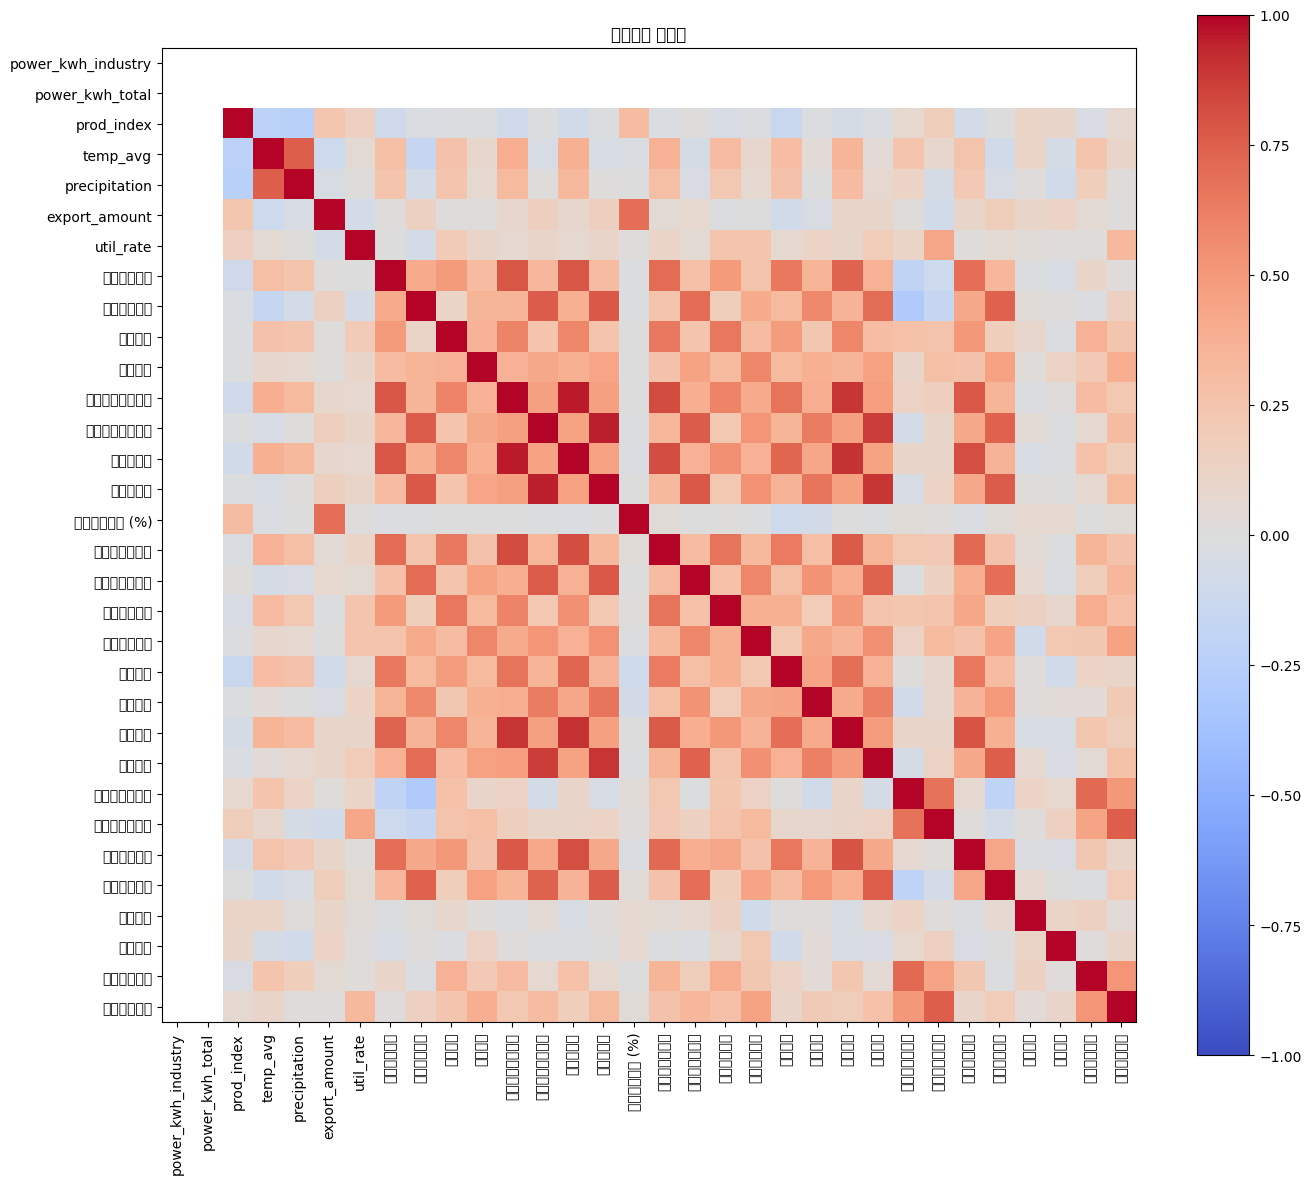

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. wide-form Î≥ÄÌôò
df_wide = df.pivot_table(
    index=['month', 'region', 'power_kwh_industry', 'power_kwh_total', 'prod_index', 'temp_avg', 'precipitation', 'export_amount', 'util_rate'],
    columns='indicator',
    values='value'
).reset_index()

# 3. Ïà´ÏûêÌòï Ïª¨Îüº Î≥ÄÌôò
for col in ['power_kwh_industry', 'power_kwh_total', 'prod_index', 'temp_avg', 'precipitation', 'export_amount', 'util_rate']:
    df_wide[col] = pd.to_numeric(df_wide[col], errors='coerce')
bsi_cols = [c for c in df_wide.columns if c not in ['month', 'region']]
for c in bsi_cols:
    df_wide[c] = pd.to_numeric(df_wide[c], errors='coerce')

# 4. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corrs = df_wide.corr(numeric_only=True)

# 5. ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî (matplotlib)
plt.figure(figsize=(14, 12))
plt.imshow(corrs, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns, rotation=90)
plt.yticks(range(len(corrs)), corrs.index)
plt.title('ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ')
plt.tight_layout()
plt.show()

In [79]:
import pandas as pd

df_wide = df.pivot_table(
    index=['month', 'region', 'power_kwh_industry', 'power_kwh_total', 'prod_index', 'temp_avg', 'precipitation', 'export_amount', 'util_rate'],
    columns='indicator',
    values='value'
).reset_index()

# Ïà´ÏûêÌòï Î≥ÄÌôò
num_cols = [c for c in df_wide.columns if c not in ['month','region']]
for col in num_cols:
    df_wide[col] = pd.to_numeric(df_wide[col], errors='coerce')

# ÏßÄÏó≠Î≥ÑÎ°ú Í∑∏Î£π ÌõÑ ÏÉÅÍ¥ÄÍ≥ÑÏàò
for region in df_wide['region'].unique():
    df_region = df_wide[df_wide['region']==region]
    corr = df_region.corr(numeric_only=True)
    print(f"\n[{region}] ÏÉÅÍ¥ÄÍ≥ÑÏàò:")
    print(corr['prod_index'].sort_values(ascending=False).head(10))


[Í∞ïÏõê] ÏÉÅÍ¥ÄÍ≥ÑÏàò:
indicator
prod_index    1.000000
ÏõêÏûêÏû¨Í∞ÄÍ≤©ÌòÑÌô©       0.175331
ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†Ï†ÑÎßù       0.174358
Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)    0.169022
Ï†úÌíàÍ∞ÄÍ≤©ÌòÑÌô©        0.095173
ÏõêÏûêÏû¨Í∞ÄÍ≤©Ï†ÑÎßù       0.081991
ÏàòÏ∂úÌòÑÌô©          0.041343
Í≤ΩÏÉÅÏù¥ÏùµÌòÑÌô©       -0.019649
util_rate    -0.033061
ÏÑ§ÎπÑÌà¨ÏûêÌòÑÌô©       -0.091381
Name: prod_index, dtype: float64

[Í≤ΩÍ∏∞] ÏÉÅÍ¥ÄÍ≥ÑÏàò:
indicator
prod_index       1.000000
Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)       0.592286
ÏàòÏ∂úÏ†ÑÎßù             0.203906
export_amount    0.195336
util_rate        0.190006
Í≤ΩÏÉÅÏù¥ÏùµÏ†ÑÎßù           0.112834
Í≤ΩÏÉÅÏù¥ÏùµÌòÑÌô©           0.111943
ÏûêÍ∏àÏÇ¨Ï†ïÏ†ÑÎßù           0.108762
ÏàòÏ∂úÌòÑÌô©             0.097641
ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©          0.087520
Name: prod_index, dtype: float64

[Í≤ΩÎÇ®] ÏÉÅÍ¥ÄÍ≥ÑÏàò:
indicator
prod_index    1.000000
Í≥†Ïö©ÌòÑÌô©          0.508217
Ïû¨Í≥†Ï†ÑÎßù          0.472192
Í≤ΩÏÉÅÏù¥ÏùµÌòÑÌô©        0.468435
ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©       0.349484
Í≤ΩÏÉÅÏù¥

In [81]:
## ÏõîÎ≥Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÎΩëÍ∏∞ (Ïó∞ÏÜçÏÑ±/Í≥ÑÏ†àÏÑ± Î∂ÑÏÑù))
for month in sorted(df_wide['month'].unique()):
    df_month = df_wide[df_wide['month']==month]
    corr = df_month.corr(numeric_only=True)
    print(f"\n[{month}] ÏÉÅÍ¥ÄÍ≥ÑÏàò:")
    print(corr['prod_index'].sort_values(ascending=False).head(10))


[2020-09-01] ÏÉÅÍ¥ÄÍ≥ÑÏàò:
indicator
prod_index       1.000000
Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÌòÑÌô©         0.458554
Îß§Ï∂úÏï°ÌòÑÌô©            0.423965
export_amount    0.419298
Ïû¨Í≥†ÌòÑÌô©             0.388751
ÏõêÏûêÏû¨Í∞ÄÍ≤©ÌòÑÌô©          0.275921
Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)       0.233479
ÏàòÏ∂úÌòÑÌô©             0.218245
Í≤ΩÏÉÅÏù¥ÏùµÌòÑÌô©           0.184995
ÏûêÍ∏àÏÇ¨Ï†ïÌòÑÌô©           0.168721
Name: prod_index, dtype: float64

[2020-12-01] ÏÉÅÍ¥ÄÍ≥ÑÏàò:
indicator
prod_index       1.000000
export_amount    0.674280
Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)       0.473834
Ïû¨Í≥†ÌòÑÌô©             0.332067
ÏõêÏûêÏû¨Í∞ÄÍ≤©ÌòÑÌô©          0.268508
ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†Ï†ÑÎßù         -0.007314
Îß§Ï∂úÏï°Ï†ÑÎßù           -0.013597
ÏÑ§ÎπÑÌà¨ÏûêÏ†ÑÎßù          -0.053661
Ï†úÌíàÍ∞ÄÍ≤©ÌòÑÌô©          -0.055256
Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÏ†ÑÎßù        -0.057438
Name: prod_index, dtype: float64

[2021-03-01] ÏÉÅÍ¥ÄÍ≥ÑÏàò:
indicator
prod_index       1.000000
Ï†úÌíàÍ∞ÄÍ≤©ÌòÑÌô©           0.253906
Ïû¨Í≥†ÌòÑÌô©             0.245567
ÏÑ§ÎπÑÌà¨Ïûê

In [82]:
# Lag(ÏÑ†ÌõÑÌñâ) Í¥ÄÍ≥Ñ ÌÉêÏÉâ
# Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ ‚Üí ÏÉùÏÇ∞ÏßÄÏàò lag(+1Í∞úÏõî, +2Í∞úÏõî)
# ÏòàÏãú: Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ(1Í∞úÏõî Ï†Ñ)Ïù¥ ÏÉùÏÇ∞ÏßÄÏàòÏôÄ ÏÉÅÍ¥Ä ÎÜíÏùÄÏßÄ
df_wide['power_kwh_industry_lag1'] = df_wide.groupby('region')['power_kwh_industry'].shift(1)
lag_corr = df_wide[['prod_index','power_kwh_industry_lag1']].corr(numeric_only=True)
print('1Í∞úÏõî lag ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:', lag_corr)

# Îã§ÏñëÌïú ÏßÄÌëú/lagÎ°ú Î∞òÎ≥µ Í∞ÄÎä•
for lag in [1, 2, 3]:
    df_wide[f'power_kwh_industry_lag{lag}'] = df_wide.groupby('region')['power_kwh_industry'].shift(lag)
    corr = df_wide[['prod_index', f'power_kwh_industry_lag{lag}']].corr(numeric_only=True)
    print(f'{lag}Í∞úÏõî lag ÏÉÅÍ¥ÄÍ≥ÑÏàò: {corr.iloc[0,1]:.3f}')


1Í∞úÏõî lag ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: indicator                prod_index  power_kwh_industry_lag1
indicator                                                   
prod_index                      1.0                      NaN
power_kwh_industry_lag1         NaN                      NaN
1Í∞úÏõî lag ÏÉÅÍ¥ÄÍ≥ÑÏàò: nan
2Í∞úÏõî lag ÏÉÅÍ¥ÄÍ≥ÑÏàò: nan
3Í∞úÏõî lag ÏÉÅÍ¥ÄÍ≥ÑÏàò: nan


# Î™®Îç∏ÎßÅ

In [245]:
import pandas as pd

# ÌååÏùº Í≤ΩÎ°úÏóê ÎßûÍ≤å ÌååÏùºÎ™Ö ÏûÖÎ†•
df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option1_with_bsi_long.csv', encoding='utf-8')
print(df.shape)
print(df.head())

(6930, 11)
        month region power_kwh_industry power_kwh_total  prod_index  temp_avg  \
0  2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2      18.4   
1  2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2      18.4   
2  2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2      18.4   
3  2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2      18.4   
4  2020-09-01     Í∞ïÏõê       550,068,712   1,313,720,713        103.2      18.4   

   precipitation  export_amount  util_rate indicator  value  
0          225.5        1430879       73.7      ÏãúÌô©ÌòÑÌô©   88.0  
1          225.5        1430879       73.7     Îß§Ï∂úÏï°ÌòÑÌô©   81.0  
2          225.5        1430879       73.7  Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÌòÑÌô©   83.0  
3          225.5        1430879       73.7      ÏàòÏ∂úÌòÑÌô©   80.0  
4          225.5        1430879       73.7      Ïû¨Í≥†ÌòÑÌô©   88.0  


In [246]:
# Ïª¨ÎüºÎ™Ö ÌôïÏù∏
print(df.columns)

Index(['month', 'region', 'power_kwh_industry', 'power_kwh_total',
       'prod_index', 'temp_avg', 'precipitation', 'export_amount', 'util_rate',
       'indicator', 'value'],
      dtype='object')


In [247]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
print(df.dtypes)

month                  object
region                 object
power_kwh_industry     object
power_kwh_total        object
prod_index            float64
temp_avg              float64
precipitation         float64
export_amount           int64
util_rate             float64
indicator              object
value                 float64
dtype: object


In [248]:
# Í≤∞Ï∏°Ïπò/ Î¨∏ÏûêÌòï Ïà´Ïûê Ï≤¥ÌÅ¨
print(df.isnull().sum())

month                 0
region                0
power_kwh_industry    0
power_kwh_total       0
prod_index            0
temp_avg              0
precipitation         0
export_amount         0
util_rate             0
indicator             0
value                 0
dtype: int64


In [249]:
# Î¨∏ÏûêÌòï Ïà´Ïûê ‚Üí float Î≥ÄÌôò
for col in ['power_kwh_industry', 'power_kwh_total']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [250]:
print(df.dtypes)

month                  object
region                 object
power_kwh_industry      int64
power_kwh_total         int64
prod_index            float64
temp_avg              float64
precipitation         float64
export_amount           int64
util_rate             float64
indicator              object
value                 float64
dtype: object


In [251]:
df['region_code'] = df['region'].astype('category').cat.codes

In [252]:
df_pivot = df.pivot_table(
    index=['month', 'region', 'power_kwh_industry', 'power_kwh_total', 'prod_index', 'temp_avg', 'precipitation', 'export_amount', 'util_rate'],
    columns='indicator',
    values='value'
).reset_index()

In [253]:
# indicatorÎ≥Ñ wide ÌîºÎ≤ó
df_wide = df.pivot_table(
    index=['region', 'power_kwh_industry', 'power_kwh_total', 'prod_index', 'temp_avg', 'precipitation', 'export_amount', 'util_rate'],
    columns='indicator',
    values='value'
).reset_index()

In [254]:
# ÏßÄÏó≠ ÏΩîÎìúÎ°ú Î≥ÄÌôò
df_wide['region_code'] = df_wide['region'].astype('category').cat.codes

In [255]:
# feature/target ÏÑ†ÌÉù (ÏÉÅÍ¥Ä ÎÜíÏùÄ Î≥ÄÏàò ÏúÑÏ£º)
features = [
    'export_amount', 'Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)', 'Îß§Ï∂úÏï°ÌòÑÌô©', 'Ïû¨Í≥†ÌòÑÌô©',
    'ÏõêÏûêÏû¨Í∞ÄÍ≤©ÌòÑÌô©', 'util_rate', 'power_kwh_industry', 'region_code'
]
target = 'prod_index'

In [256]:
# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df_model = df_wide.dropna(subset=features + [target])
X = df_model[features]
y = df_model[target]

In [257]:
# Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [258]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# Î™®Îç∏ ÌïôÏäµ
model = XGBRegressor(n_estimators=200)
model.fit(X_train, y_train)

# Î™®Îç∏ ÏòàÏ∏°
y_pred = model.predict(X_test)

In [259]:
# Î™®Îç∏ ÌèâÍ∞Ä
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.4f}")

RMSE: 12.38, MAE: 9.48, R¬≤: -1.0487


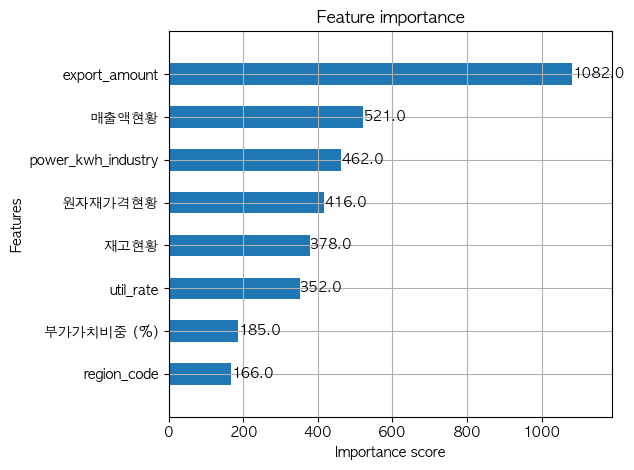

In [260]:
# Î≥ÄÏàò Ï§ëÏöîÎèÑ ÌôïÏù∏
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model, height=0.5)
plt.tight_layout()
plt.show()

---

Ï†úÏ°∞ÏóÖÍ≤ΩÍ∏∞Ïã§ÏÇ¨ÏßÄÏàò_ÏßÄÏó≠Î≥Ñ_Ï†ÑÏ≤òÎ¶¨ÏôÑÎ£å.csv + option3_merged_allregion_2015_2025.csv => 2015~2025, ÏÑ∏Ï¢Ö Ìè¨Ìï®, ÏµúÏã† Ï†ïÏ±ÖÎ∂ÑÏÑùÏö©

In [3]:
# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
df_main = pd.read_csv('Î≥ëÌï©ÌååÏùº/option3_merged_allregion_2015_2025.csv')
df_bsi = pd.read_csv('Ï†úÏ°∞ÏóÖÍ≤ΩÍ∏∞Ïã§ÏÇ¨ÏßÄÏàò_ÏßÄÏó≠Î≥Ñ_Ï†ÑÏ≤òÎ¶¨ÏôÑÎ£å.csv')

In [4]:
# ÎÇ†Ïßú, ÏßÄÏó≠Ìòï ÌÜµÏùº
df_main['month'] = pd.to_datetime(df_main['month'])
df_bsi['month'] = pd.to_datetime(df_bsi['month'])
df_main['region'] = df_main['region'].astype(str)
df_bsi['region'] = df_bsi['region'].astype(str)


In [5]:
# Î≥ëÌï©
df_merged = pd.merge(df_main, df_bsi, on=['month', 'region'], how='left')

In [6]:
# Í≤∞Í≥º Ï†ÄÏû•
df_merged.to_csv('option3_with_bsi_2015_2025.csv', index=False)

### EDA ÏΩîÎìú

In [10]:
# Ìñâ/Ïó¥ Í∞úÏàò, Ï£ºÏöî Ïª¨ÎüºÎ™Ö ÌôïÏù∏
# ÏßÄÏó≠Î≥Ñ, ÏßÄÌëúÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ïª§Î≤ÑÎ¶¨ÏßÄ
# Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÜíÏùÄ Ïª¨Îüº ÌååÏïÖ

import pandas as pd

df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option3_with_bsi_2015_2025.csv')
print(df.shape)
print(df.head())
print(df.info())
print(df.isnull().mean())  # Í≤∞Ï∏°Ïπò ÎπÑÏú®
print(df['region'].unique())  # ÏßÄÏó≠ ÌôïÏù∏
print(df['indicator'].unique())  # BSI ÏßÄÌëú Ï¢ÖÎ•ò ÌôïÏù∏

(8629, 12)
        month region power_kwh_industry  power_kwh_total  prod_index  \
0  2015-01-01     Í∞ïÏõê       585,592,815    1,617,029,201       90.726   
1  2015-01-01     Í≤ΩÍ∏∞     4,997,455,612   10,014,789,252       66.022   
2  2015-01-01     Í≤ΩÎÇ®     1,757,495,823    3,299,662,507      118.906   
3  2015-01-01     Í≤ΩÎ∂Å     2,923,805,965    4,191,097,159      127.250   
4  2015-01-01     Í¥ëÏ£º       266,092,703      776,667,026      106.893   

   temp_avg  precipitation  export_amount  util_rate_x  util_rate_y indicator  \
0      -2.4           13.3         152283         75.0         75.0       NaN   
1      -1.1           13.7        9412306         75.0         75.0       NaN   
2       2.0           29.2        5581400         75.0         75.0       NaN   
3       0.8           18.7        4025281         75.0         75.0       NaN   
4       1.7           47.2        1314089         75.0         75.0       NaN   

   value  
0    NaN  
1    NaN  
2    NaN  
3    

In [11]:
# Í∏∞Ï¥à ÌÜµÍ≥Ñ Î∂ÑÏÑù (Í∏∞Ïà†ÌÜµÍ≥Ñ)
# ÏßÄÌëúÎ≥Ñ¬∑ÏßÄÏó≠Î≥Ñ ÌèâÍ∑†/Ï§ëÏïôÍ∞í/ÏµúÎåìÍ∞í/ÏµúÏÜüÍ∞í Îì± Î∂ÑÌè¨ ÌôïÏù∏
print(df.describe(include='all'))

# BSIÎ≥Ñ Í∏∞Ïà†ÌÜµÍ≥Ñ
print(df.groupby('indicator')['value'].describe())

# Ï†ÑÎ†•/ÏÉùÏÇ∞ÏßÄÏàò Îì± Ï£ºÏöî Ïª¨ÎüºÎèÑ ÌÜµÍ≥Ñ ÌôïÏù∏
main_vars = ['power_kwh_industry', 'power_kwh_total', 'prod_index', 'export_amount']
print(df[main_vars].apply(pd.to_numeric, errors='coerce').describe())

             month region power_kwh_industry power_kwh_total   prod_index  \
count         8629   8629               8629            8629  8629.000000   
unique         124     16               1984            1984          NaN   
top     2021-03-01     Í∞ïÏõê     1,748,109,289   2,724,004,606           NaN   
freq           376    567                 25              25          NaN   
mean           NaN    NaN                NaN             NaN   110.748798   
std            NaN    NaN                NaN             NaN    11.729762   
min            NaN    NaN                NaN             NaN    62.294000   
25%            NaN    NaN                NaN             NaN   103.200000   
50%            NaN    NaN                NaN             NaN   110.300000   
75%            NaN    NaN                NaN             NaN   116.500000   
max            NaN    NaN                NaN             NaN   176.600000   

           temp_avg  precipitation  export_amount  util_rate_x  util_ra

In [17]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú Ï∞æÍ∏∞ (ÏòàÏãú: 'AppleGothic' or 'Malgun Gothic')
plt.rc('font', family='AppleGothic')  # Mac
# plt.rc('font', family='Malgun Gothic')  # Windows

# 2. ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

# Ïù¥Ï†ú Ïù¥ÌõÑ plot Î™®Îëê ÌïúÍ∏Ä Ï†ïÏÉÅ ÌëúÏãú!

/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_81182/2874859732.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_month = df.groupby('month').apply(lambda x: x.isnull().mean())


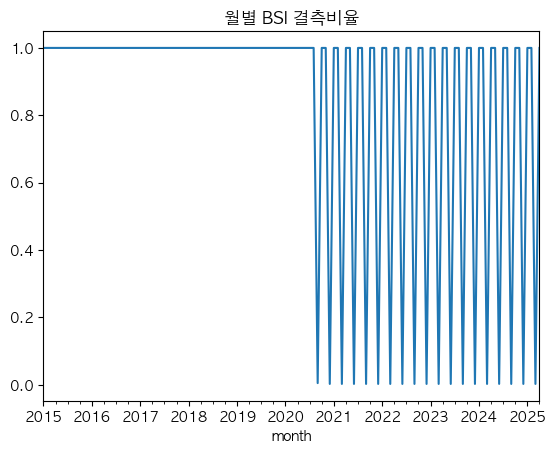

In [21]:
# ÏãúÍ∞ÑÎ≥Ñ Í≤∞Ï∏°Ïπò Ìå®ÌÑ¥ ÌôïÏù∏
import matplotlib.pyplot as plt

# ÏõîÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò
df['month'] = pd.to_datetime(df['month'])
missing_by_month = df.groupby('month').apply(lambda x: x.isnull().mean())
missing_by_month['value'].plot(title='ÏõîÎ≥Ñ BSI Í≤∞Ï∏°ÎπÑÏú®')
plt.show()

/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_81182/951771188.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_region = df.groupby('region').apply(lambda x: x.isnull().mean())


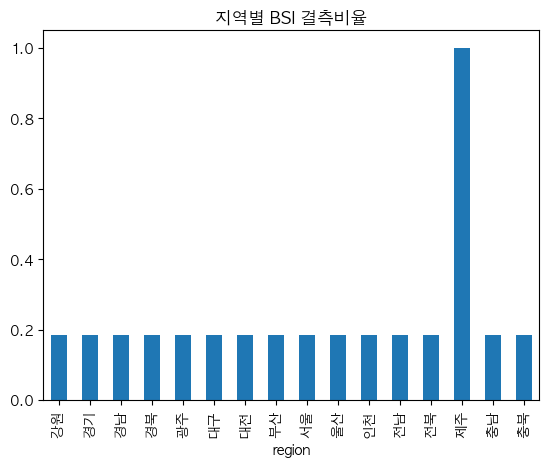

In [19]:
# ÏßÄÏó≠Î≥Ñ Í≤∞Ï∏°Ïπò Ìå®ÌÑ¥ ÌôïÏù∏
missing_by_region = df.groupby('region').apply(lambda x: x.isnull().mean())
missing_by_region['value'].plot(kind='bar', title='ÏßÄÏó≠Î≥Ñ BSI Í≤∞Ï∏°ÎπÑÏú®')
plt.show()

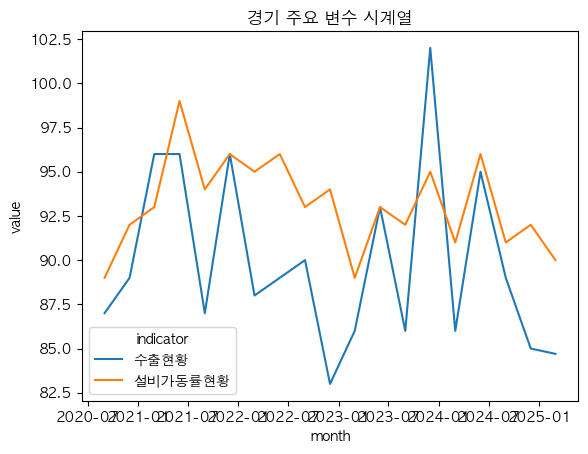

In [20]:
#  Î≥ÄÏàòÎ≥Ñ ÏãúÍ≥ÑÏó¥ Plot
# Ïòà: Í≤ΩÍ∏∞ ÏßÄÏó≠, prod_index & Ï£ºÏöî BSIÎßå plot
import seaborn as sns

region = 'Í≤ΩÍ∏∞'
temp = df[(df['region'] == region) & (df['indicator'].isin(['prod_index', 'ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©', 'ÏàòÏ∂úÌòÑÌô©']))]
sns.lineplot(data=temp, x='month', y='value', hue='indicator')
plt.title(f"{region} Ï£ºÏöî Î≥ÄÏàò ÏãúÍ≥ÑÏó¥")
plt.show()

In [31]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_main = pd.read_csv('Î≥ëÌï©ÌååÏùº/option3_merged_allregion_2015_2025.csv', parse_dates=['month'])
df_bsi = pd.read_csv('Ï†úÏ°∞ÏóÖÍ≤ΩÍ∏∞Ïã§ÏÇ¨ÏßÄÏàò_ÏßÄÏó≠Î≥Ñ_Ï†ÑÏ≤òÎ¶¨ÏôÑÎ£å.csv', parse_dates=['month'])

# Î≥ëÌï©
df_merged = pd.merge(df_bsi, df_main, on=['month', 'region'], how='left')

# Ïà´ÏûêÌòï Ïª¨Îüº Î≥ÄÌôò
num_cols = ['power_kwh_industry', 'power_kwh_total', 'prod_index', 'export_amount', 'util_rate']
for col in num_cols:
    if col in df_merged.columns:
        df_merged[col] = (
            df_merged[col]
            .astype(str)
            .str.replace(',', '', regex=False)
            .str.strip()
            .replace('', 'NaN')
        )
        df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

# BSI indicatorÎ≥Ñ value wide-form
pivot = df_merged.pivot_table(index=['month', 'region'], columns='indicator', values='value')

# Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÇ¨Ïö©
exist_cols = [col for col in num_cols if col in df_merged.columns]

base_vars = (
    df_merged[['month', 'region'] + exist_cols]
    .drop_duplicates(subset=['month', 'region'])
    .set_index(['month', 'region'])
)
# join (Ïù∏Îç±Ïä§ Í∏∞Ï§Ä, Ï§ëÎ≥µ ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ÎùºÎ©¥ ÏïàÏ†Ñ)
pivot = pivot.join(base_vars)

# ÌòπÏãú Î™®Î•º Ïà´ÏûêÌòï Ïû¨ÌôïÏù∏
for col in num_cols:
    if col in pivot.columns:
        pivot[col] = pd.to_numeric(pivot[col], errors='coerce')

# ÏÉÅÍ¥ÄÍ≥ÑÏàò
corrs = pivot.corr()['prod_index'].sort_values(ascending=False)
print(corrs)

prod_index            1.000000
Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)            0.300499
power_kwh_industry    0.282341
power_kwh_total       0.278983
export_amount         0.230907
ÏõêÏûêÏû¨Í∞ÄÍ≤©ÌòÑÌô©               0.175612
Ïû¨Í≥†Ï†ÑÎßù                  0.112671
Ïû¨Í≥†ÌòÑÌô©                  0.098490
ÏõêÏûêÏû¨Í∞ÄÍ≤©Ï†ÑÎßù               0.073829
Ï†úÌíàÍ∞ÄÍ≤©ÌòÑÌô©                0.061124
ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©               0.005511
ÏûêÍ∏àÏÇ¨Ï†ïÌòÑÌô©               -0.003594
ÏàòÏ∂úÌòÑÌô©                 -0.008061
Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÌòÑÌô©             -0.010874
Í≥†Ïö©ÌòÑÌô©                 -0.012716
Îß§Ï∂úÏï°ÌòÑÌô©                -0.013248
ÏÑ§ÎπÑÌà¨ÏûêÌòÑÌô©               -0.018804
Í≥†Ïö©Ï†ÑÎßù                 -0.022101
Í≤ΩÏÉÅÏù¥ÏùµÌòÑÌô©               -0.029693
ÏãúÌô©ÌòÑÌô©                 -0.030370
ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†Ï†ÑÎßù              -0.031221
Ï†úÌíàÍ∞ÄÍ≤©Ï†ÑÎßù               -0.034871
ÏÑ§ÎπÑÌà¨ÏûêÏ†ÑÎßù               -0.053791
ÏãúÌô©Ï†ÑÎßù                 -0.054825
ÏûêÍ∏àÏÇ¨Ï†ïÏ†ÑÎßù               -

###  prod_index Í∏∞Ï§Ä ÏãúÍ≥ÑÏó¥ plot

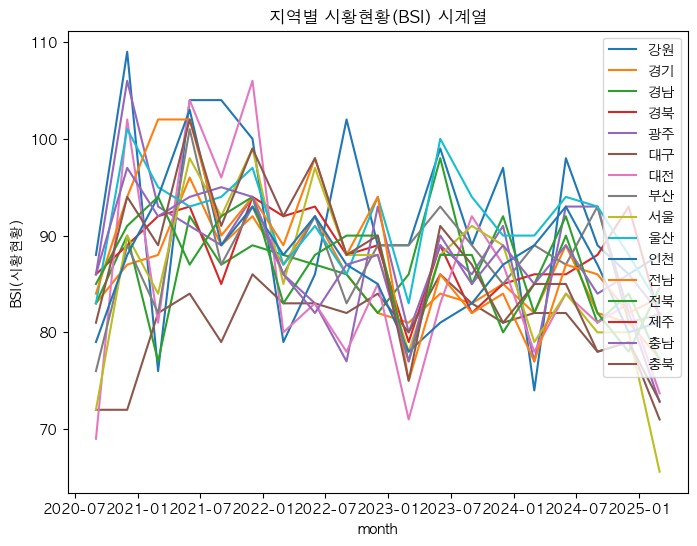

In [38]:
# BSI indicator
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for reg in df['region'].unique():
    temp = df[(df['region']==reg) & (df['indicator']=='ÏãúÌô©ÌòÑÌô©')]
    plt.plot(temp['month'], temp['value'], label=reg)

plt.legend()
plt.title("ÏßÄÏó≠Î≥Ñ ÏãúÌô©ÌòÑÌô©(BSI) ÏãúÍ≥ÑÏó¥")
plt.xlabel("month")
plt.ylabel("BSI(ÏãúÌô©ÌòÑÌô©)")
plt.show()

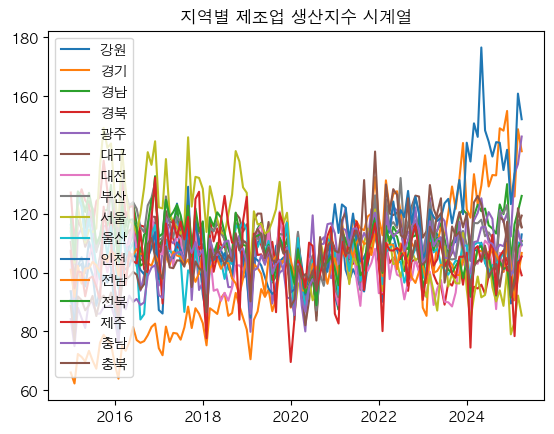

In [ ]:
# ÏÉùÏÇ∞ÏßÄÏàò ÏãúÍ≥ÑÏó¥
for reg in df['region'].unique():
    temp = df_main[df_main['region']==reg]
    plt.plot(temp['month'], temp['prod_index'], label=reg)
plt.legend()
plt.title("ÏßÄÏó≠Î≥Ñ Ï†úÏ°∞ÏóÖ ÏÉùÏÇ∞ÏßÄÏàò ÏãúÍ≥ÑÏó¥")
plt.show()

## 1. Ï†úÏ°∞ÏóÖ ÏÉùÏÇ∞ÏßÄÏàò vs. BSI(ÏãúÌô©ÌòÑÌô©) ÎèôÌñâÏÑ±/ÏÑ†ÌñâÏÑ± ÏãúÍ≥ÑÏó¥

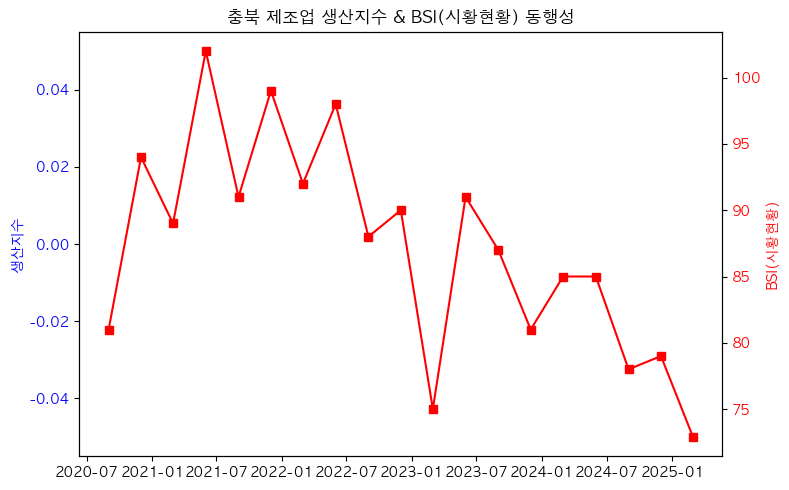

In [98]:
import matplotlib.pyplot as plt

region = 'Ï∂©Î∂Å'  # ÏõêÌïòÎäî ÏßÄÏó≠ÏúºÎ°ú Î≥ÄÍ≤Ω
fig, ax1 = plt.subplots(figsize=(8,5))

# ÏÉùÏÇ∞ÏßÄÏàò plot
prod = df[(df['region']==region) & (df['indicator']=='prod_index')]
ax1.plot(prod['month'], prod['value'], color='b', marker='o', label='ÏÉùÏÇ∞ÏßÄÏàò')
ax1.set_ylabel('ÏÉùÏÇ∞ÏßÄÏàò', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# BSI(ÏãúÌô©ÌòÑÌô©) plot (Ïò§Î•∏Ï™Ω yÏ∂ï)
ax2 = ax1.twinx()
bsi = df[(df['region']==region) & (df['indicator']=='ÏãúÌô©ÌòÑÌô©')]
ax2.plot(bsi['month'], bsi['value'], color='r', marker='s', label='ÏãúÌô©ÌòÑÌô©')
ax2.set_ylabel('BSI(ÏãúÌô©ÌòÑÌô©)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title(f'{region} Ï†úÏ°∞ÏóÖ ÏÉùÏÇ∞ÏßÄÏàò & BSI(ÏãúÌô©ÌòÑÌô©) ÎèôÌñâÏÑ±')
fig.tight_layout()
plt.show()

## ÏßÄÏó≠Î≥Ñ Í≤©Ï∞®/ÎèôÏ°∞ÏÑ±(Ïó¨Îü¨ ÏßÄÏó≠ Í≤πÏ≥êÏÑú)

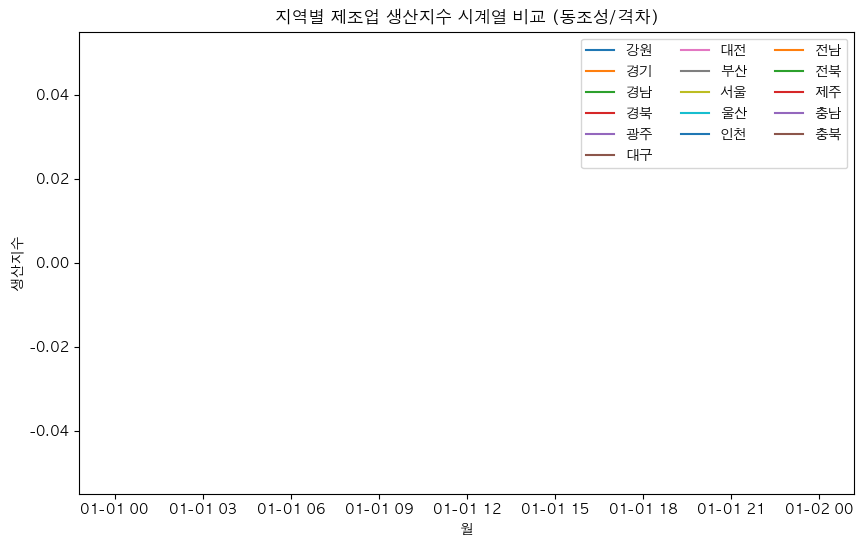

In [52]:
plt.figure(figsize=(10,6))
for reg in df['region'].unique():
    temp = df[(df['region']==reg) & (df['indicator']=='prod_index')]
    plt.plot(temp['month'], temp['value'], label=reg)
plt.legend(ncol=3)
plt.title("ÏßÄÏó≠Î≥Ñ Ï†úÏ°∞ÏóÖ ÏÉùÏÇ∞ÏßÄÏàò ÏãúÍ≥ÑÏó¥ ÎπÑÍµê (ÎèôÏ°∞ÏÑ±/Í≤©Ï∞®)")
plt.xlabel("Ïõî")
plt.ylabel("ÏÉùÏÇ∞ÏßÄÏàò")
plt.show()

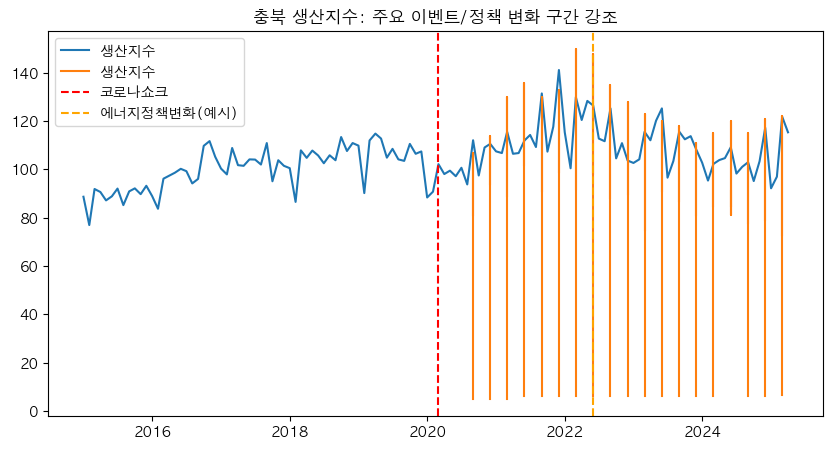

In [99]:
# Ïù¥Î≤§Ìä∏¬∑Ï†ïÏ±Ö Íµ¨Í∞Ñ Í∞ïÏ°∞ (ÏòàÏãú: ÏΩîÎ°úÎÇò ÏßÅÌõÑ Î≥ÄÌôîÍµ¨Í∞Ñ Í∞ïÏ°∞)
plt.figure(figsize=(10,5))
prod = df[df['region']==region]
plt.plot(prod['month'], prod['prod_index'], label='ÏÉùÏÇ∞ÏßÄÏàò')
plt.plot(prod['month'], prod['value'], label='ÏÉùÏÇ∞ÏßÄÏàò')
plt.axvline(pd.Timestamp('2020-03-01'), color='red', linestyle='--', label='ÏΩîÎ°úÎÇòÏáºÌÅ¨')
plt.axvline(pd.Timestamp('2022-06-01'), color='orange', linestyle='--', label='ÏóêÎÑàÏßÄÏ†ïÏ±ÖÎ≥ÄÌôî(ÏòàÏãú)')
plt.legend()
plt.title(f"{region} ÏÉùÏÇ∞ÏßÄÏàò: Ï£ºÏöî Ïù¥Î≤§Ìä∏/Ï†ïÏ±Ö Î≥ÄÌôî Íµ¨Í∞Ñ Í∞ïÏ°∞")
plt.show()

## ÏÇ∞Ï†êÎèÑ(Scatter) ÌîåÎ°Ø: ÏÉùÏÇ∞ÏßÄÏàò vs BSI(ÏãúÌô©ÌòÑÌô©)

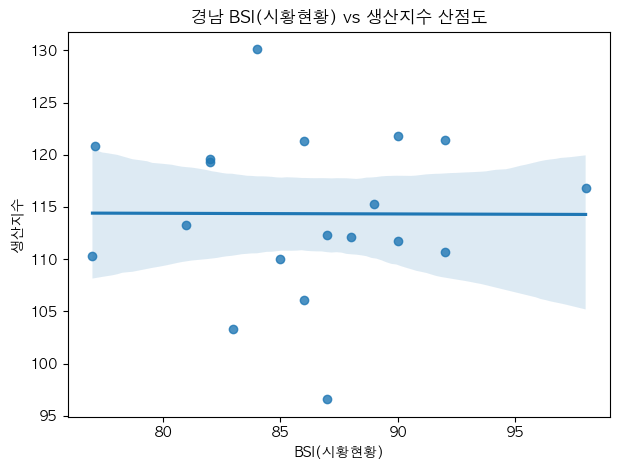

In [105]:
region = 'Í≤ΩÎÇ®'
tmp = df[df['region']==region]
pivot = tmp.pivot_table(index='month', columns='indicator', values='value')
# prod_indexÎäî Îî∞Î°ú Î∂àÎü¨ÏôÄÏÑú merge
prod = tmp[['month', 'prod_index']].drop_duplicates().set_index('month')
pivot = pivot.join(prod)
plt.figure(figsize=(7,5))
sns.regplot(x=pivot['ÏãúÌô©ÌòÑÌô©'], y=pivot['prod_index'])
plt.title(f"{region} BSI(ÏãúÌô©ÌòÑÌô©) vs ÏÉùÏÇ∞ÏßÄÏàò ÏÇ∞Ï†êÎèÑ")
plt.xlabel('BSI(ÏãúÌô©ÌòÑÌô©)')
plt.ylabel('ÏÉùÏÇ∞ÏßÄÏàò')
plt.show()

## Î®∏Ïã†Îü¨Îãù/ÏòàÏ∏°Î™®Îç∏ ÏûÖÎ†• Î≥ÄÏàò ÏÑ†Ï†ï
- ÏÉÅÍ¥ÄÍ≥ÑÏàò ÎÜíÏùÄ Î≥ÄÏàò Ï§ëÏã¨ ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± <br>
‚Üí Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë, Ï†ÑÎ†•, ÏàòÏ∂úÍ∏àÏï°, BSI Ï£ºÏöîÏßÄÌëú(ÏÑ§ÎπÑÍ∞ÄÎèôÎ•† Îì±) Îì± ÏòàÏ∏°Î™®Îç∏Ïö© Î≥ÄÏàò ÏÑ∏Ìä∏ Ï†úÏïà <br>
‚Üí lag Î≥ÄÏàò(Ï†ÑÏõî/Ï†ÑÎ∂ÑÍ∏∞ Í∞í) ÏÉùÏÑ±ÌïòÏó¨ ÏÑ†ÌñâÏÑ± ÌÖåÏä§Ìä∏ 

In [57]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÎÜíÏùÄ Î≥ÄÏàò Ï§ëÏã¨ÏúºÎ°ú ÌååÏÉùÎ≥ÄÏàò & ÏûÖÎ†• Î≥ÄÏàò ÏÉùÏÑ±
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú (ÌååÏùºÎ™Ö ÎßûÏ∂∞ÏÑú)
df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option3_with_bsi_2015_2025.csv', parse_dates=['month'])

# BSI Ï£ºÏöî indicator wide-formÏúºÎ°ú
pivot = df.pivot_table(index=['month','region'], columns='indicator', values='value')

# Ï§ëÏöî Ïà´ÏûêÌòï Î≥ÄÏàò Î≥ëÌï©
num_cols = ['prod_index', 'power_kwh_industry', 'power_kwh_total', 'export_amount', 'util_rate', 'temp_avg', 'precipitation']
for col in num_cols:
    if col in df.columns:
        pivot[col] = df.groupby(['month','region'])[col].first()

pivot = pivot.reset_index()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò ÎÜíÏùÄ Î≥ÄÏàòÎì§Îßå feature setÏúºÎ°ú
features = [
    'prod_index', 'Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)', 'power_kwh_industry', 'export_amount', 'util_rate',
    'ÏãúÌô©ÌòÑÌô©', 'ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©'
]

In [58]:
print(pivot.columns)
print([col for col in features if col not in pivot.columns])

Index(['month', 'region', 'Í≤ΩÏÉÅÏù¥ÏùµÏ†ÑÎßù', 'Í≤ΩÏÉÅÏù¥ÏùµÌòÑÌô©', 'Í≥†Ïö©Ï†ÑÎßù', 'Í≥†Ïö©ÌòÑÌô©', 'Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÏ†ÑÎßù',
       'Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÌòÑÌô©', 'Îß§Ï∂úÏï°Ï†ÑÎßù', 'Îß§Ï∂úÏï°ÌòÑÌô©', 'Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)', 'ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†Ï†ÑÎßù', 'ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©',
       'ÏÑ§ÎπÑÌà¨ÏûêÏ†ÑÎßù', 'ÏÑ§ÎπÑÌà¨ÏûêÌòÑÌô©', 'ÏàòÏ∂úÏ†ÑÎßù', 'ÏàòÏ∂úÌòÑÌô©', 'ÏãúÌô©Ï†ÑÎßù', 'ÏãúÌô©ÌòÑÌô©', 'ÏõêÏûêÏû¨Í∞ÄÍ≤©Ï†ÑÎßù',
       'ÏõêÏûêÏû¨Í∞ÄÍ≤©ÌòÑÌô©', 'ÏûêÍ∏àÏÇ¨Ï†ïÏ†ÑÎßù', 'ÏûêÍ∏àÏÇ¨Ï†ïÌòÑÌô©', 'Ïû¨Í≥†Ï†ÑÎßù', 'Ïû¨Í≥†ÌòÑÌô©', 'Ï†úÌíàÍ∞ÄÍ≤©Ï†ÑÎßù', 'Ï†úÌíàÍ∞ÄÍ≤©ÌòÑÌô©',
       'prod_index', 'power_kwh_industry', 'power_kwh_total', 'export_amount',
       'temp_avg', 'precipitation'],
      dtype='object', name='indicator')
['util_rate']


In [60]:
# Ïã§Ï†úÎ°ú ÏûàÎäî Ïª¨ÎüºÎßå featuresÎ°ú ÏûêÎèô ÌïÑÌÑ∞
features = [
    'prod_index', 'Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)', 'power_kwh_industry', 'export_amount', 'util_rate',
    'ÏãúÌô©ÌòÑÌô©', 'ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©'
]

# pivotÏóê Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå Ï∂îÏ∂ú
real_features = [col for col in features if col in pivot.columns]
print("Ïã§Ï†ú ÏÇ¨Ïö©Ìï† feature Ïª¨Îüº:", real_features)

X = pivot[real_features].dropna()
X.head()

Ïã§Ï†ú ÏÇ¨Ïö©Ìï† feature Ïª¨Îüº: ['prod_index', 'Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)', 'power_kwh_industry', 'export_amount', 'ÏãúÌô©ÌòÑÌô©', 'ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©']


indicator  prod_index  Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%) power_kwh_industry  export_amount  ÏãúÌô©ÌòÑÌô©  \
0               103.2         1.0       550,068,712         1430879  88.0   
1               108.7        37.0     5,830,713,009        84058529  83.0   
2               103.3         7.0     1,600,784,258        25754171  83.0   
3               103.9         8.0     2,357,528,894        26090784  86.0   
4               110.6         2.0       266,309,128         9951938  86.0   

indicator  ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©  
0             98.0  
1             89.0  
2             89.0  
3             91.0  
4             90.0

### ÏÑ†ÌõÑÌñâ(lag) Î∂ÑÏÑù
- BSI ‚Üí Ïã§Ï†ú ÏÉùÏÇ∞ÏßÄÏàò lag Î∂ÑÏÑù <br>
‚Üí BSI(ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†, ÏãúÌô© Îì±)Í∞Ä 1~3Í∞úÏõî ÏÑ†Ìñâ/ÎèôÌñâÏù∏ÏßÄ, cross-correlation plot Í∑∏Î†§ÏÑú Í∞ÄÏû• ÎÜíÏùÄ lag ÌÉêÏÉâ  <br>
‚Üí Ï†ïÏ±Ö ÌÉÄÏù¥Î∞ç ÏòàÏ∏°, ‚ÄúÌòÑÏû• Ï≤¥Í∞ê‚Äù vs ‚ÄúÏã§Ï†ú ÏßÄÌëú‚Äù ÏãúÏ∞® Î∂ÑÏÑù

In [ ]:
#  lag(ÏÑ†ÌõÑÌñâ) Î≥ÄÏàò ÏÉùÏÑ± Î∞è lag ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù
# (1) util_rateÍ∞Ä ÏóÜÏúºÎ©¥ join
if 'util_rate' not in pivot.columns and 'util_rate' in df_merged.columns:
    util_df = df_merged[['month', 'region', 'util_rate']].drop_duplicates().set_index(['month', 'region'])
    pivot = pivot.join(util_df)
    pivot['util_rate'] = pd.to_numeric(pivot['util_rate'], errors='coerce')

# (2) Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå lag ÏÉùÏÑ±
lag_cols = ['power_kwh_industry', 'export_amount', 'util_rate', 'ÏãúÌô©ÌòÑÌô©', 'ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©']
lag_cols = [col for col in lag_cols if col in pivot.columns]

for lag in [1, 2, 3]:
    for col in lag_cols:
        pivot[f'{col}_lag{lag}'] = pivot.groupby('region')[col].shift(lag)

### Cross-correlation plot (lagÎ≥Ñ ÏãúÏ∞® ÏòÅÌñ• ÏãúÍ∞ÅÌôî)

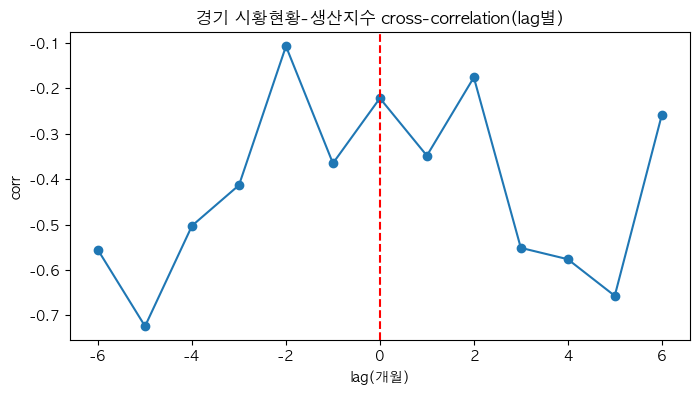

In [74]:
import matplotlib.pyplot as plt

region = 'Í≤ΩÍ∏∞'
temp = pivot[pivot['region']==region]
x = temp['ÏãúÌô©ÌòÑÌô©'].dropna()
y = temp['prod_index'].dropna()
max_lag = 6

# lag cross-correlation
cross_corr = [x.corr(y.shift(l)) for l in range(-max_lag, max_lag+1)]
plt.figure(figsize=(8,4))
plt.plot(range(-max_lag, max_lag+1), cross_corr, marker='o')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"{region} ÏãúÌô©ÌòÑÌô©-ÏÉùÏÇ∞ÏßÄÏàò cross-correlation(lagÎ≥Ñ)")
plt.xlabel('lag(Í∞úÏõî)')
plt.ylabel('corr')
plt.show()

#### Í≤∞Í≥º : BSIÏôÄ ÏÉùÏÇ∞ÏßÄÏàòÏùò Î™ÖÌôïÌïú ÏÑ†ÌõÑÌñâ Í¥ÄÍ≥ÑÍ∞Ä ÏóÜÍ≥†, ÎèôÌñâ ÎòêÎäî ÏïΩÌïú ÌõÑÌñâ Ìå®ÌÑ¥Îßå Î≥¥ÏûÑ.

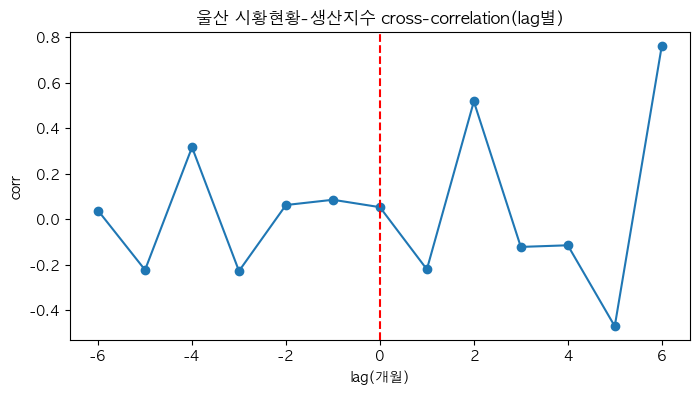

In [68]:
import matplotlib.pyplot as plt

region = 'Ïö∏ÏÇ∞'
temp = pivot[pivot['region']==region]
x = temp['ÏãúÌô©ÌòÑÌô©'].dropna()
y = temp['prod_index'].dropna()
max_lag = 6

# lag cross-correlation
cross_corr = [x.corr(y.shift(l)) for l in range(-max_lag, max_lag+1)]
plt.figure(figsize=(8,4))
plt.plot(range(-max_lag, max_lag+1), cross_corr, marker='o')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"{region} ÏãúÌô©ÌòÑÌô©-ÏÉùÏÇ∞ÏßÄÏàò cross-correlation(lagÎ≥Ñ)")
plt.xlabel('lag(Í∞úÏõî)')
plt.ylabel('corr')
plt.show()

#### Í≤∞Í≥º : BSIÍ∞Ä ÏÉùÏÇ∞ÏßÄÏàòÎ≥¥Îã§ ÏïΩ 5~6Í∞úÏõî ÏÑ†ÌñâÌïòÎØÄÎ°ú, BSIÎßåÏúºÎ°ú ÏÉùÏÇ∞ÏßÄÏàò Î≥ÄÎèôÏùÑ ÎØ∏Î¶¨ ÏòàÏ∏° Í∞ÄÎä•

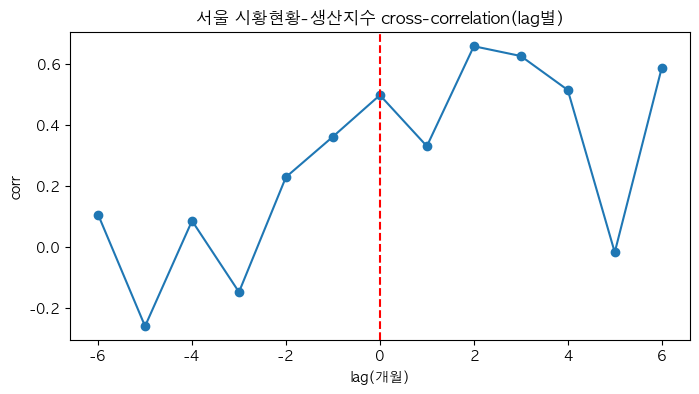

In [69]:
import matplotlib.pyplot as plt

region = 'ÏÑúÏö∏'
temp = pivot[pivot['region']==region]
x = temp['ÏãúÌô©ÌòÑÌô©'].dropna()
y = temp['prod_index'].dropna()
max_lag = 6

# lag cross-correlation
cross_corr = [x.corr(y.shift(l)) for l in range(-max_lag, max_lag+1)]
plt.figure(figsize=(8,4))
plt.plot(range(-max_lag, max_lag+1), cross_corr, marker='o')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"{region} ÏãúÌô©ÌòÑÌô©-ÏÉùÏÇ∞ÏßÄÏàò cross-correlation(lagÎ≥Ñ)")
plt.xlabel('lag(Í∞úÏõî)')
plt.ylabel('corr')
plt.show()

### Í≤∞Í≥º : BSIÍ∞Ä ÏïΩ 2~3Í∞úÏõî ÏïûÏÑú Î≥ÄÎèôÌïòÎ©∞, ÏÑúÏö∏Ïùò ÏÉùÏÇ∞ÏßÄÏàò Ï°∞Í∏∞ ÏòàÏ∏°Ïóê ÌôúÏö©Ìï† Ïàò ÏûàÏùå.

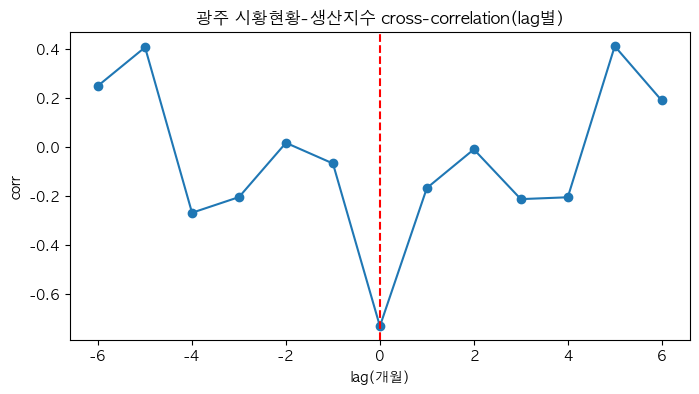

In [84]:
import matplotlib.pyplot as plt

region = 'Í¥ëÏ£º'
temp = pivot[pivot['region']==region]
x = temp['ÏãúÌô©ÌòÑÌô©'].dropna()
y = temp['prod_index'].dropna()
max_lag = 6

# lag cross-correlation
cross_corr = [x.corr(y.shift(l)) for l in range(-max_lag, max_lag+1)]
plt.figure(figsize=(8,4))
plt.plot(range(-max_lag, max_lag+1), cross_corr, marker='o')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"{region} ÏãúÌô©ÌòÑÌô©-ÏÉùÏÇ∞ÏßÄÏàò cross-correlation(lagÎ≥Ñ)")
plt.xlabel('lag(Í∞úÏõî)')
plt.ylabel('corr')
plt.show()

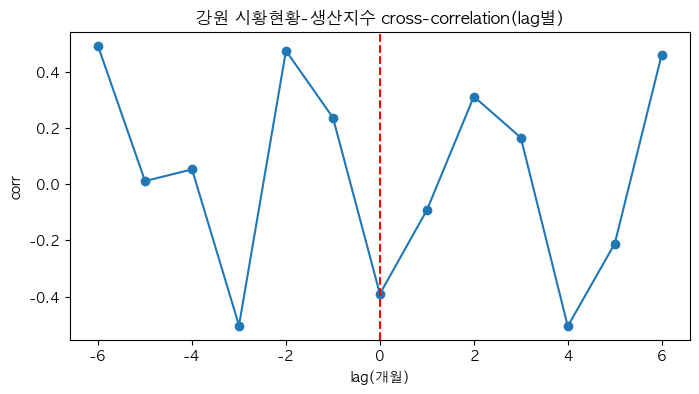

In [72]:
import matplotlib.pyplot as plt

region = 'Í∞ïÏõê'
temp = pivot[pivot['region']==region]
x = temp['ÏãúÌô©ÌòÑÌô©'].dropna()
y = temp['prod_index'].dropna()
max_lag = 6

# lag cross-correlation
cross_corr = [x.corr(y.shift(l)) for l in range(-max_lag, max_lag+1)]
plt.figure(figsize=(8,4))
plt.plot(range(-max_lag, max_lag+1), cross_corr, marker='o')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"{region} ÏãúÌô©ÌòÑÌô©-ÏÉùÏÇ∞ÏßÄÏàò cross-correlation(lagÎ≥Ñ)")
plt.xlabel('lag(Í∞úÏõî)')
plt.ylabel('corr')
plt.show()

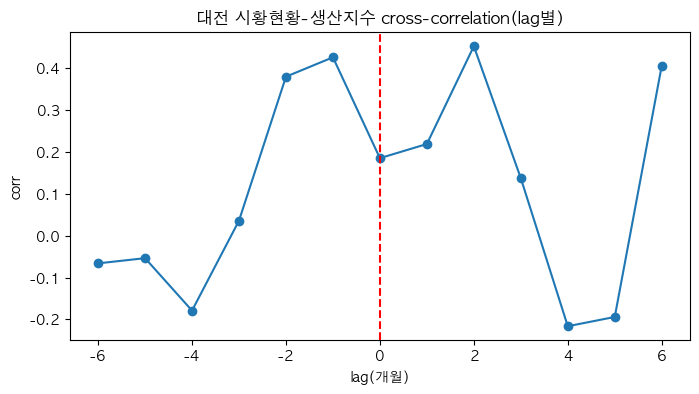

In [85]:
import matplotlib.pyplot as plt

region = 'ÎåÄÏ†Ñ'
temp = pivot[pivot['region']==region]
x = temp['ÏãúÌô©ÌòÑÌô©'].dropna()
y = temp['prod_index'].dropna()
max_lag = 6

# lag cross-correlation
cross_corr = [x.corr(y.shift(l)) for l in range(-max_lag, max_lag+1)]
plt.figure(figsize=(8,4))
plt.plot(range(-max_lag, max_lag+1), cross_corr, marker='o')
plt.axvline(0, color='red', linestyle='--')
plt.title(f"{region} ÏãúÌô©ÌòÑÌô©-ÏÉùÏÇ∞ÏßÄÏàò cross-correlation(lagÎ≥Ñ)")
plt.xlabel('lag(Í∞úÏõî)')
plt.ylabel('corr')
plt.show()

### Î∂ÑÏÑù Í≤∞Í≥º
- **ÏßÄÏó≠Î≥ÑÎ°ú BSIÏôÄ ÏÉùÏÇ∞ÏßÄÏàòÏùò ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÏµúÎåÄÍ∞Ä ÎêòÎäî lag(ÏãúÏ∞®)** Í∞Ä Îã§Î•¥Í≤å ÎÇòÌÉÄÎÇòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§.
- ÏòàÎ•º Îì§Ïñ¥, ÏÑúÏö∏/Ïö∏ÏÇ∞/ÎåÄÍµ¨ Îì± ÏùºÎ∂Ä ÏßÄÏó≠ÏóêÏÑúÎäî BSIÍ∞Ä ÏÉùÏÇ∞ÏßÄÏàòÏóê ÎåÄÌï¥ **ÏÑ†Ìñâ(1~3Í∞úÏõî Î®ºÏ†Ä ÏõÄÏßÅÏûÑ)** ÌïòÍ±∞ÎÇò, Î∞òÎåÄÎ°ú Í≤ΩÍ∏∞ÏôÄ Í∞ôÏùÄ ÏßÄÏó≠ÏùÄ ÎèôÌñâ ÎòêÎäî ÌõÑÌñâÌïòÎäî ÏñëÏÉÅÏù¥ ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.
- BSIÏôÄ ÏÉùÏÇ∞ÏßÄÏàòÏùò ÎèôÌñâ ÎòêÎäî 1~2Í∞úÏõî ÏÑ†Ìñâ Ìå®ÌÑ¥Ïù¥ ÏûàÏßÄÎßå, ÏßÄÏó≠ÎßàÎã§ Ï∞®Ïù¥Í∞Ä ÌÅº.

Ïù¥Îü∞ Ï∞®Ïù¥Îäî ÌòÑÏû•Ïùò Í≤ΩÍ∏∞ Ï≤¥Í∞êÏù¥ Ïã§Ï†ú ÏÉùÏÇ∞ÌôúÎèôÏóê Î∞òÏòÅÎêòÎäî ÏãúÍ∞ÑÏ†Å Ï∞®Ïù¥, ÎòêÎäî Ï†ïÏ±ÖÌö®Í≥ºÍ∞Ä ÏßÄÌëúÏóê ÎÇòÌÉÄÎÇòÎäî ÏÜçÎèÑÏùò Ï∞®Ïù¥Î°ú Ìï¥ÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§.

---

## Î®∏Ïã†Îü¨Îãù/ÏòàÏ∏°Î™®Îç∏ ÏûÖÎ†• Î≥ÄÏàò ÏÑ†Ï†ï

In [75]:
# [1] Ï£ºÏöî Î≥ÄÏàò ÏÑ†Ï†ï: ÏÉÅÍ¥ÄÍ≥ÑÏàò ÎÜíÏùÄ Î≥ÄÏàò ÏúÑÏ£ºÎ°ú feature set Íµ¨ÏÑ±
# Ïã§Ï†ú ÏÇ¨Ïö©Ìï† feature Ïª¨Îüº
features = ['Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)', 'power_kwh_industry', 'export_amount', 'ÏãúÌô©ÌòÑÌô©', 'ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©']

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (wide format: pivot ÌÖåÏù¥Î∏î ÌòïÌÉúÎ°ú ÎßåÎì§Ïñ¥Ï†∏ ÏûàÏñ¥Ïïº Ìï®)
import pandas as pd

# (Ïù¥ÎØ∏ wide-formÏúºÎ°ú ÎêòÏñ¥ ÏûàÎã§Î©¥ Ïù¥ Í≥ºÏ†ïÏùÄ ÏÉùÎûµ)
# ÏòàÏãú: df = pd.read_csv('Î®∏Ïã†Îü¨Îãù_Îç∞Ïù¥ÌÑ∞ÏÖã.csv', parse_dates=['month'])

# Í≤∞Ï∏°Ïπò Ìñâ Ï†úÍ±∞
X = pivot[features + ['prod_index']].dropna()

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(X.head())

indicator  Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%) power_kwh_industry  export_amount  ÏãúÌô©ÌòÑÌô©  ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©  \
0                 1.0       550,068,712         1430879  88.0     98.0   
1                37.0     5,830,713,009        84058529  83.0     89.0   
2                 7.0     1,600,784,258        25754171  83.0     89.0   
3                 8.0     2,357,528,894        26090784  86.0     91.0   
4                 2.0       266,309,128         9951938  86.0     90.0   

indicator  prod_index  
0               103.2  
1               108.7  
2               103.3  
3               103.9  
4               110.6  


| Î≥ÄÏàò                 | lag1 ÏÉÅÍ¥ÄÍ≥ÑÏàò | lag2 ÏÉÅÍ¥ÄÍ≥ÑÏàò | lag3 ÏÉÅÍ¥ÄÍ≥ÑÏàò | Ìï¥ÏÑù ÏöîÏïΩ                                     |
|---------------------|:------------:|:------------:|:------------:|:----------------------------------------------|
| Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)     |    0.303     |    0.290     |    0.319     | ÏÉùÏÇ∞ÏßÄÏàòÏôÄ **ÏùºÍ¥ÄÎêú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ**, ÏÑ†ÌõÑÌñâ Ìö®Í≥º O   |
| power_kwh_industry  |    0.285     |    0.274     |    0.282     | ÏÇ∞ÏóÖÏö© Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ, ÏÉùÏÇ∞ÏßÄÏàò ÏòàÏ∏° Ïã†Ìò∏Î°ú Ïú†ÏùòÎØ∏       |
| export_amount       |    0.303     |    0.247     |    0.093     | ÏàòÏ∂úÍ∏àÏï°ÎèÑ **ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ**, lag ÎäòÏàòÎ°ù Í∞êÏÜå         |
| ÏãúÌô©ÌòÑÌô©            |   -0.002     |    0.068     |   -0.064     | Ïã¨Î¶¨ÏßÄÌëú(ÏãúÌô©ÌòÑÌô©), ÏÉÅÍ¥Ä ÏïΩÌïòÍ±∞ÎÇò Í±∞Ïùò ÏóÜÏùå          |
| ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©       |    0.018     |    0.030     |   -0.093     | ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†, ÏòÅÌñ• Í±∞Ïùò ÏóÜÏùå                        |

## ÏÑ†ÌõÑÌñâ(lag) Î∂ÑÏÑù

In [80]:
pivot_reset = pivot.reset_index()

# Ïà´ÏûêÌòï Ïª¨Îüº(Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Í≤ÉÎßå) Î≥ÄÌôò: ÏΩ§Îßà/Í≥µÎ∞± Ï†úÍ±∞ ÌõÑ float Î≥ÄÌôò
num_cols = ['power_kwh_industry', 'power_kwh_total', 'prod_index', 'export_amount', 'util_rate']
for col in num_cols:
    if col in pivot_reset.columns:
        pivot_reset[col] = (
            pivot_reset[col]
            .astype(str)
            .str.replace(',', '', regex=False)
            .str.strip()
        )
        pivot_reset[col] = pd.to_numeric(pivot_reset[col], errors='coerce')

# (Ïù¥ÌõÑ lag Î≥ÄÏàò ÏÉùÏÑ±~)
for lag in [1, 2, 3]:
    for col in features:
        pivot_reset[f'{col}_lag{lag}'] = (
            pivot_reset.groupby('region')[col].shift(lag)
        )

pivot_reset = pivot_reset.set_index(['month', 'region'])

for lag in [1, 2, 3]:
    print(f"\n=== lag {lag}Í∞úÏõî ===")
    for col in features:
        colname = f'{col}_lag{lag}'
        subdf = pivot_reset[[colname, 'prod_index']].dropna()
        # lag ÌååÏÉù Ïª¨ÎüºÎèÑ float Î≥ÄÌôò(ÏïàÏ†ÑÏû•Ïπò)
        subdf[colname] = pd.to_numeric(subdf[colname], errors='coerce')
        subdf['prod_index'] = pd.to_numeric(subdf['prod_index'], errors='coerce')
        corr = subdf[colname].corr(subdf['prod_index'])
        print(f"{colname} vs prod_index: {corr:.3f}")


=== lag 1Í∞úÏõî ===
Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)_lag1 vs prod_index: 0.303
power_kwh_industry_lag1 vs prod_index: 0.285
export_amount_lag1 vs prod_index: 0.303
ÏãúÌô©ÌòÑÌô©_lag1 vs prod_index: -0.002
ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©_lag1 vs prod_index: 0.018

=== lag 2Í∞úÏõî ===
Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)_lag2 vs prod_index: 0.290
power_kwh_industry_lag2 vs prod_index: 0.274
export_amount_lag2 vs prod_index: 0.247
ÏãúÌô©ÌòÑÌô©_lag2 vs prod_index: 0.068
ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©_lag2 vs prod_index: 0.030

=== lag 3Í∞úÏõî ===
Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)_lag3 vs prod_index: 0.319
power_kwh_industry_lag3 vs prod_index: 0.282
export_amount_lag3 vs prod_index: 0.093
ÏãúÌô©ÌòÑÌô©_lag3 vs prod_index: -0.064
ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©_lag3 vs prod_index: -0.093


#### ÏÉùÏÇ∞ÏßÄÏàò(prod_index)ÏôÄ ÏãúÏ∞®Î≥Ñ(lag) Ï£ºÏöî Î≥ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
| Î≥ÄÏàòÎ™Ö                   | lag 1Í∞úÏõî | lag 2Í∞úÏõî | lag 3Í∞úÏõî | Ìï¥ÏÑù/ÌäπÏßï                                                         |
|-------------------------|:---------:|:---------:|:---------:|-------------------------------------------------------------------|
| Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)         |   0.303   |   0.290   |   0.319   | Ï†ÑÏõî~3Í∞úÏõî Ï†Ñ Î∂ÄÍ∞ÄÍ∞ÄÏπòÍ∞Ä ÎÜíÏúºÎ©¥ ÏÉùÏÇ∞ÏßÄÏàòÎèÑ ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ•(Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥Ä)    |
| power_kwh_industry      |   0.285   |   0.274   |   0.282   | ÏÇ∞ÏóÖÏö© Ï†ÑÎ†•ÏÇ¨Ïö©ÎüâÎèÑ ÏÉùÏÇ∞ÏßÄÏàòÏôÄ Íæ∏Ï§ÄÌûà ÎÜíÏùÄ ÏÉÅÍ¥Ä(Ïã§Ï†ú ÏÇ∞ÏóÖ ÌôúÎèôÎüâ Î∞òÏòÅ)     |
| export_amount           |   0.303   |   0.247   |   0.093   | 1~2Í∞úÏõî Ï†Ñ ÏàòÏ∂úÏù¥ ÎßéÏúºÎ©¥ ÏÉùÏÇ∞ÏßÄÏàòÏóê Í∏çÏ†ï ÏòÅÌñ•, 3Í∞úÏõîÏùÄ ÏïΩÌï¥Ïßê            |
| ÏãúÌô©ÌòÑÌô©                 |  -0.002   |   0.068   |  -0.064   | BSI ÏãúÌô©ÏùÄ ÏÉùÏÇ∞ÏßÄÏàòÏôÄ ÏßÅÏ†ëÏ†Å Ïó∞Í¥Ä Í±∞Ïùò ÏóÜÏùå(Ïã¨Î¶¨ÏßÄÌëú ÌïúÍ≥Ñ)               |
| ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©            |   0.018   |   0.030   |  -0.093   | ÏÑ§ÎπÑÍ∞ÄÎèôÎ•† Ïó≠Ïãú Ïã§Ï†ú ÏÉùÏÇ∞ÏßÄÏàòÏôÄÎäî ÏïΩÌïú ÏÉÅÍ¥Ä                             |

## Í≤∞Î°†
- Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë, ÏÇ∞ÏóÖÏö© Ï†ÑÎ†•ÏÇ¨Ïö©Îüâ, ÏàòÏ∂úÍ∏àÏï°Ïù¥ lag 1~3Í∞úÏõîÏóêÏÑú ÏÉùÏÇ∞ÏßÄÏàòÏôÄ ÏÉÅÍ¥ÄÏù¥ Í∞ÄÏû• ÎÜíÏùå ‚Üí ÏòàÏ∏°Î†• ÏûàÎäî Ï£ºÏöî Î≥ÄÏàò
- BSI ÏãúÌô©ÌòÑÌô©, ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©ÏùÄ ÏÉùÏÇ∞ÏßÄÏàòÏôÄ ÎèôÏ°∞ÏÑ±Ïù¥ ÏïΩÌï® ‚Üí Ï∞∏Í≥† Î≥¥Ï°∞ÏßÄÌëúÎ°úÎßå ÌôúÏö©
- ÏÇ¨Ïö©ÏûêÏóêÍ≤åÎäî ‚ÄúÎ∂ÄÍ∞ÄÍ∞ÄÏπòÏôÄ Ï†ÑÎ†•ÏÇ¨Ïö©ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎ©¥ ÏÉùÏÇ∞ÏßÄÏàòÎèÑ Í∞ôÏù¥ Ïò§Î•∏Îã§‚ÄúÎäî Ïù∏ÏÇ¨Ïù¥Ìä∏Î°ú Ï†úÍ≥µ Í∞ÄÎä•

---

# Î™®Îç∏ÎßÅ ÎßõÎ≥¥Í∏∞

In [129]:
# Í∞ÄÏÉÅÌôòÍ≤ΩÏóêÏÑú ÏÑ§ÏπòÌï† ÎïåÎäî Î∞òÎìúÏãú brewÎ°ú libomp Î®ºÏ†Ä ÏÑ§ÏπòÌïòÍ≥†
!brew install libomp


==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
backgroundremover          gemini-cli                 yaml2json
==> New Casks
font-tenderness            msgfiler                   spacesaver

You have 9 outdated formulae and 1 outdated cask installed.

==> Downloading https://ghcr.io/v2/homebrew/core/libomp/manifests/20.1.7
######################################################################### 100.0%
==> Fetching libomp
==> Downloading https://ghcr.io/v2/homebrew/core/libomp/blobs/sha256:a93e7a009eb
######################################################################### 100.0%
==> Pouring libomp--20.1.7.arm64_sonoma.bottle.tar.gz
==> Caveats
libomp is keg-only, which means it was not symlinked into /opt/homebrew,
because it can override GCC heade

In [131]:
!brew info libomp

==> libomp: stable 20.1.7 (bottled) [keg-only]
LLVM's OpenMP runtime library
https://openmp.llvm.org/
Installed
/opt/homebrew/Cellar/libomp/20.1.7 (9 files, 1.7MB)
  Poured from bottle using the formulae.brew.sh API on 2025-06-26 at 20:54:37
From: https://github.com/Homebrew/homebrew-core/blob/HEAD/Formula/lib/libomp.rb
License: MIT
==> Dependencies
Build: cmake ‚úò, lit ‚úò
==> Caveats
libomp is keg-only, which means it was not symlinked into /opt/homebrew,
because it can override GCC headers and result in broken builds.

For compilers to find libomp you may need to set:
  export LDFLAGS="-L/opt/homebrew/opt/libomp/lib"
  export CPPFLAGS="-I/opt/homebrew/opt/libomp/include"
==> Analytics
install: 59,396 (30 days), 189,138 (90 days), 655,493 (365 days)
install-on-request: 16,620 (30 days), 48,722 (90 days), 148,684 (365 days)
build-error: 6 (30 days)


In [192]:
import pandas as pd
import xgboost as xgb # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


In [264]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option3_with_bsi_2015_2025.csv')  # Ïã§Ï†ú ÌååÏùºÎ™ÖÏúºÎ°ú Î∞îÍøîÏ§ò

In [265]:
# lag Î≥ÄÏàò ÎßåÎì§ ÎåÄÏÉÅ Ïª¨Îüº Î¶¨Ïä§Ìä∏
lag_cols = ['power_kwh_industry', 'export_amount', 'util_rate_x', 'util_rate_y']

In [266]:
# ÏßÄÏó≠Î≥ÑÎ°ú 1~3Í∞úÏõî lag Î≥ÄÏàò ÏÉùÏÑ±
for col in lag_cols:
    for l in [1, 2, 3]:
        df[f"{col}_lag{l}"] = df.groupby('region')[col].shift(l)

In [267]:
# ÏßÄÏó≠ Ïù∏ÏΩîÎî©
df['region_code'] = df['region'].astype('category').cat.codes

In [268]:
#  feature & target Ïª¨Îüº Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏ ÏßÄÏ†ï
features = [
    'power_kwh_industry_lag1',
    'export_amount_lag1',
    'util_rate_x_lag1',
    'util_rate_y_lag1',
    'region_code'
]
target = 'prod_index'

In [269]:
print(df[features + [target]].isnull().sum())

power_kwh_industry_lag1    16
export_amount_lag1         16
util_rate_x_lag1           16
util_rate_y_lag1           16
region_code                 0
prod_index                  0
dtype: int64


In [270]:
print(df[features + [target]].head(10))

  power_kwh_industry_lag1  export_amount_lag1  util_rate_x_lag1  \
0                     NaN                 NaN               NaN   
1                     NaN                 NaN               NaN   
2                     NaN                 NaN               NaN   
3                     NaN                 NaN               NaN   
4                     NaN                 NaN               NaN   
5                     NaN                 NaN               NaN   
6                     NaN                 NaN               NaN   
7                     NaN                 NaN               NaN   
8                     NaN                 NaN               NaN   
9                     NaN                 NaN               NaN   

   util_rate_y_lag1  region_code  prod_index  
0               NaN            0      90.726  
1               NaN            1      66.022  
2               NaN            2     118.906  
3               NaN            3     127.250  
4               NaN        

In [271]:
print(df[features + [target]][df['power_kwh_industry_lag1'].notnull()].head(10))

   power_kwh_industry_lag1  export_amount_lag1  util_rate_x_lag1  \
16            585,592,815             152283.0              75.0   
17          4,997,455,612            9412306.0              75.0   
18          1,757,495,823            5581400.0              75.0   
19          2,923,805,965            4025281.0              75.0   
20            266,092,703            1314089.0              75.0   
21            602,778,084             609500.0              75.0   
22            286,480,493             408262.0              75.0   
23            723,831,996            1281646.0              75.0   
24            462,259,628            4765699.0              75.0   
25          2,248,509,343            5533531.0              75.0   

    util_rate_y_lag1  region_code  prod_index  
16              75.0            0      84.073  
17              75.0            1      62.294  
18              75.0            2     104.994  
19              75.0            3     109.988  
20         

In [272]:
# ÏΩ§Îßà Ï†úÍ±∞ + Ïà´Ïûê Î≥ÄÌôò
for col in ['power_kwh_industry', 'export_amount']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    for l in [1]:
        df[f'{col}_lag{l}'] = df.groupby('region')[col].shift(l)
        # lag Î≥ÄÏàòÎèÑ ÏΩ§Îßà Ï†úÍ±∞
        df[f'{col}_lag{l}'] = df[f'{col}_lag{l}'].astype(str).str.replace(',', '', regex=False)

# ÎÇòÎ®∏ÏßÄ lag Î≥ÄÏàòÎèÑ ÏàòÏπòÌòï Í∞ïÏ†ú Î≥ÄÌôò (util_rate_x, util_rate_y Îì±)
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [273]:
df_model = df.dropna(subset=features + [target])
X = df_model[features]
y = df_model[target]
print(X.shape, y.shape)  # 0Ï§Ñ ÏïÑÎãàÎ©¥ OK

(8613, 5) (8613,)


In [274]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [275]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [276]:
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [277]:
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R¬≤(Í≤∞Ï†ïÍ≥ÑÏàò): {r2:.4f}")

RMSE: 14.06, MAE: 10.12
R¬≤(Í≤∞Ï†ïÍ≥ÑÏàò): 0.2297


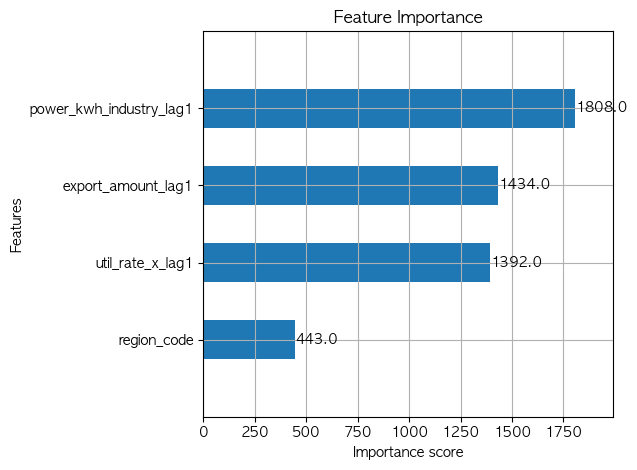

In [278]:
# Ï§ëÏöî Î≥ÄÏàò ÏãúÍ∞ÅÌôî
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model, height=0.5)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [212]:
# Ïã§Ï†úÍ∞í/ÏòàÏ∏°Í∞í ÎπÑÍµê Ìëú ÎßåÎì§Í∏∞
# Ïã§Ï†úÍ∞í, ÏòàÏ∏°Í∞í, Ïò§Ï∞®(Ïã§Ï†ú-ÏòàÏ∏°) Ï†ïÎ¶¨
result_df = X_test.copy()
result_df['Ïã§Ï†úÍ∞í'] = y_test.values
result_df['ÏòàÏ∏°Í∞í'] = y_pred
result_df['ÏòàÏ∏°Ïò§Ï∞®'] = result_df['Ïã§Ï†úÍ∞í'] - result_df['ÏòàÏ∏°Í∞í']

# Ïïû 10Í∞úÎßå ÏÉòÌîåÎ°ú Î≥¥Í∏∞
print(result_df[['Ïã§Ï†úÍ∞í', 'ÏòàÏ∏°Í∞í', 'ÏòàÏ∏°Ïò§Ï∞®']].head(10))

        Ïã§Ï†úÍ∞í         ÏòàÏ∏°Í∞í      ÏòàÏ∏°Ïò§Ï∞®
6906  102.3  102.614616 -0.314616
6907  102.3  102.614616 -0.314616
6908  102.3  102.614616 -0.314616
6909  102.3  102.614616 -0.314616
6910  102.3  102.614616 -0.314616
6911  102.3  102.614616 -0.314616
6912  102.3  102.614616 -0.314616
6913  102.3  102.614616 -0.314616
6914  102.3  102.614616 -0.314616
6915  102.3  102.614616 -0.314616


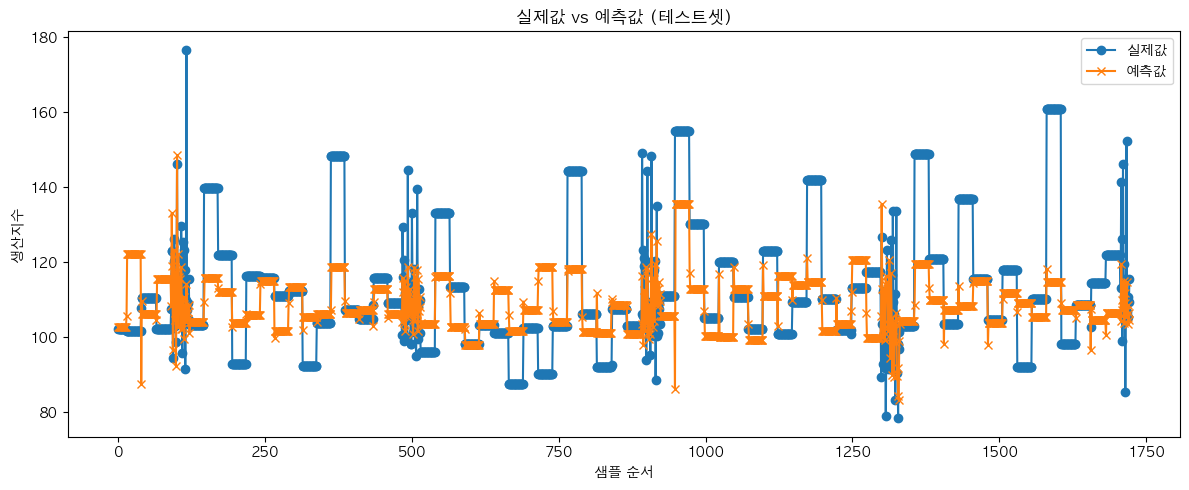

In [213]:
# Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÏÑ†Í∑∏ÎûòÌîÑ
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(result_df['Ïã§Ï†úÍ∞í'].values, label='Ïã§Ï†úÍ∞í', marker='o')
plt.plot(result_df['ÏòàÏ∏°Í∞í'].values, label='ÏòàÏ∏°Í∞í', marker='x')
plt.legend()
plt.title("Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í (ÌÖåÏä§Ìä∏ÏÖã)")
plt.xlabel("ÏÉòÌîå ÏàúÏÑú")
plt.ylabel("ÏÉùÏÇ∞ÏßÄÏàò")
plt.tight_layout()
plt.show()

In [214]:
# Í≤∞Ï†ïÍ≥ÑÏàò Ï†êÏàò
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R¬≤(Í≤∞Ï†ïÍ≥ÑÏàò): {r2:.4f}")

R¬≤(Í≤∞Ï†ïÍ≥ÑÏàò): 0.2297


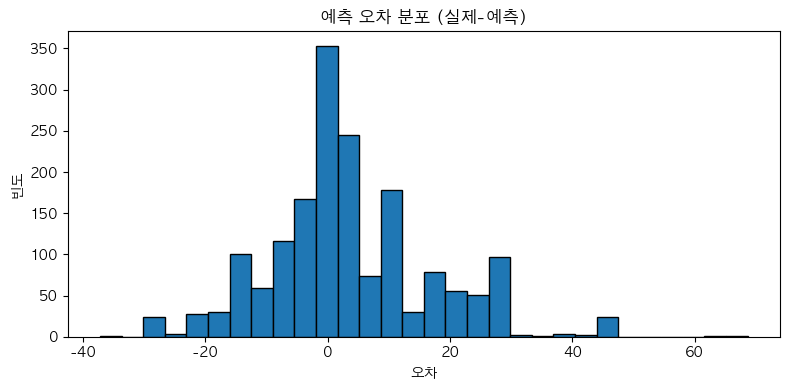

In [217]:
# ÏòàÏ∏° Ïò§Ï∞® Î∂ÑÌè¨(ÌûàÏä§ÌÜ†Í∑∏Îû®)
plt.figure(figsize=(8,4))
plt.hist(result_df['ÏòàÏ∏°Ïò§Ï∞®'], bins=30, edgecolor='k')
plt.title("ÏòàÏ∏° Ïò§Ï∞® Î∂ÑÌè¨ (Ïã§Ï†ú-ÏòàÏ∏°)")
plt.xlabel("Ïò§Ï∞®")
plt.ylabel("ÎπàÎèÑ")
plt.tight_layout()
plt.show()

# Ï†ïÏÉÅÏÑ± Í≤ÄÏÇ¨

Note: you may need to restart the kernel to use updated packages.


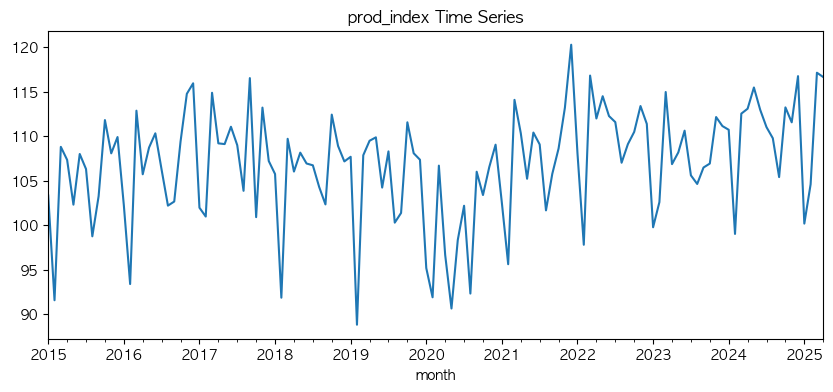

option3 Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï Í≤∞Í≥º:
ADF Test Statistic: -1.2384052123222544
p-value: 0.6568605149678646
Critical Values:
   1%: -3.4901313156261384
   5%: -2.8877122815688776
   10%: -2.5807296460459184
‚ùå Ï†ïÏÉÅÏÑ± ÏóÜÏùå (p ‚â• 0.05) ‚Üí Ï∞®Î∂Ñ ÎòêÎäî Î≥ÄÌôò ÌïÑÏöî


In [18]:
%pip install statsmodels

import pandas as pd
from statsmodels.tsa.stattools import adfuller # type: ignore
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (ÏòàÏãú)
df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option3_with_bsi_2015_2025.csv')  # ÌååÏùºÎ™ÖÏóê ÎßûÍ≤å ÏàòÏ†ï

# ÎÇ†Ïßú ÌòïÏãù Ï≤òÎ¶¨ Î∞è Ï†ïÎ†¨
df['month'] = pd.to_datetime(df['month'])
df.sort_values('month', inplace=True)

# Î∂ÑÏÑùÌï† Î≥ÄÏàò ÏÑ†ÌÉù (Ïòà: ÏÉùÏÇ∞ÏßÄÏàò)
target_col = 'prod_index'

# ÏõîÎ≥Ñ Ï†ÑÍµ≠ ÌèâÍ∑†ÏúºÎ°ú ÏãúÍ≥ÑÏó¥ Íµ¨ÏÑ±
ts = df.groupby('month')[target_col].mean()

# ÏãúÍ≥ÑÏó¥ ÌîåÎ°Ø ÌôïÏù∏
ts.plot(title=f'{target_col} Time Series', figsize=(10,4))
plt.show()

# ADF Test Ïã§Ìñâ
result = adfuller(ts.dropna())

# Í≤∞Í≥º Ï∂úÎ†•
print("option3 Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï Í≤∞Í≥º:")
print(f"ADF Test Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

# Ìï¥ÏÑù Í∏∞Ï§Ä
if result[1] < 0.05:
    print("‚úÖ Ï†ïÏÉÅÏÑ± ÏûàÏùå (p < 0.05)")
else:
    print("‚ùå Ï†ïÏÉÅÏÑ± ÏóÜÏùå (p ‚â• 0.05) ‚Üí Ï∞®Î∂Ñ ÎòêÎäî Î≥ÄÌôò ÌïÑÏöî")

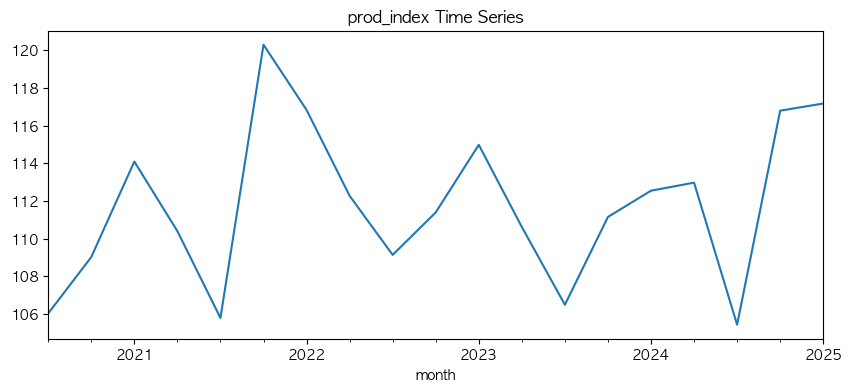

option1 Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï Í≤∞Í≥º
ADF Test Statistic: -4.514738602949736
p-value: 0.0001849270948990445
Critical Values:
   1%: -3.889265672705068
   5%: -3.0543579727254224
   10%: -2.66698384083045
‚úÖ Ï†ïÏÉÅÏÑ± ÏûàÏùå (p < 0.05)


In [19]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller # type: ignore
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (ÏòàÏãú)
df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option1_with_bsi_long.csv')  # ÌååÏùºÎ™ÖÏóê ÎßûÍ≤å ÏàòÏ†ï

# ÎÇ†Ïßú ÌòïÏãù Ï≤òÎ¶¨ Î∞è Ï†ïÎ†¨
df['month'] = pd.to_datetime(df['month'])
df.sort_values('month', inplace=True)

# Î∂ÑÏÑùÌï† Î≥ÄÏàò ÏÑ†ÌÉù (Ïòà: ÏÉùÏÇ∞ÏßÄÏàò)
target_col = 'prod_index'

# ÏõîÎ≥Ñ Ï†ÑÍµ≠ ÌèâÍ∑†ÏúºÎ°ú ÏãúÍ≥ÑÏó¥ Íµ¨ÏÑ±
ts = df.groupby('month')[target_col].mean()

# ÏãúÍ≥ÑÏó¥ ÌîåÎ°Ø ÌôïÏù∏
ts.plot(title=f'{target_col} Time Series', figsize=(10,4))
plt.show()

# ADF Test Ïã§Ìñâ
result = adfuller(ts.dropna())

# Í≤∞Í≥º Ï∂úÎ†•
print("option1 Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï Í≤∞Í≥º")
print(f"ADF Test Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

# Ìï¥ÏÑù Í∏∞Ï§Ä
if result[1] < 0.05:
    print("‚úÖ Ï†ïÏÉÅÏÑ± ÏûàÏùå (p < 0.05)")
else:
    print("‚ùå Ï†ïÏÉÅÏÑ± ÏóÜÏùå (p ‚â• 0.05) ‚Üí Ï∞®Î∂Ñ ÎòêÎäî Î≥ÄÌôò ÌïÑÏöî")

### Ï∞®Î∂Ñ ÏßÑÌñâ

In [20]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option3_with_bsi_2015_2025.csv')

# Î¨∏ÏûêÏó¥ Ïà´ÏûêÌòï Ï≤òÎ¶¨
for col in ['power_kwh_industry', 'export_amount']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False).astype(float)

# lag Î≥ÄÏàò ÏÉùÏÑ±
lag_cols = ['power_kwh_industry', 'export_amount', 'util_rate_x', 'util_rate_y']
for col in lag_cols:
    for l in [1, 2, 3]:
        df[f"{col}_lag{l}"] = df.groupby('region')[col].shift(l)

# ÏßÄÏó≠ ÏΩîÎìú
df['region_code'] = df['region'].astype('category').cat.codes

# ‚úÖ ÌÉÄÍπÉ Ï∞®Î∂Ñ Ï≤òÎ¶¨ (ÏßÄÏó≠Î≥Ñ)
df['prod_index_diff'] = df.groupby('region')['prod_index'].diff()

# ÌïôÏäµÏö© ÌîºÏ≤ò
features = [
    'power_kwh_industry_lag1',
    'export_amount_lag1',
    'util_rate_x_lag1',
    'util_rate_y_lag1',
    'region_code'
]
target = 'prod_index_diff'

# Í≤∞Ï∏° Ï†úÍ±∞
df_model = df.dropna(subset=features + [target])
X = df_model[features]
y = df_model[target]

# train/test Î∂ÑÎ¶¨ (ÏãúÍ≥ÑÏó¥ Í≥†Î†§ ‚Üí shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Î™®Îç∏ ÌïôÏäµ
model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Option3 Ï∞®Î∂Ñ ÏòàÏ∏° Í≤∞Í≥º - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.4f}")

Option3 Ï∞®Î∂Ñ ÏòàÏ∏° Í≤∞Í≥º - RMSE: 5.61, MAE: 4.16, R¬≤: -1.6859


---

### ‚Äúoption1Ïù¥ Íµ¨Ï°∞Îßå Ï†ïÎπÑÎêòÎ©¥ option3Î≥¥Îã§ ÏÑ±Îä•Ïù¥ Ï¢ãÏùÑ Ïàò ÏûàÏùÑÍπå?‚Äù

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option1_with_bsi_long.csv', encoding='utf-8')

In [2]:
# Î¨∏ÏûêÏó¥ Ïà´Ïûê Ï≤òÎ¶¨
df['power_kwh_industry'] = df['power_kwh_industry'].str.replace(',', '', regex=False).astype(float)
df['export_amount'] = df['export_amount'].astype(float)


In [3]:

# wide-format Î≥ÄÌôò (BSI indicatorÎ•º ÌîºÎ≤ó)
df_pivoted = df.pivot_table(
    index=['month', 'region', 'prod_index', 'power_kwh_industry', 'export_amount', 'util_rate'],
    columns='indicator',
    values='value',
    aggfunc='first'
).reset_index()
df_pivoted.columns.name = None

In [4]:
# lag Î≥ÄÏàò ÏÉùÏÑ± (ÏßÄÏó≠Î≥Ñ Í∏∞Ï§Ä)
lag_targets = ['power_kwh_industry', 'export_amount', 'util_rate']
for col in lag_targets:
    df_pivoted[f'{col}_lag1'] = df_pivoted.groupby('region')[col].shift(1)

In [5]:
# ÏßÄÏó≠ Ïù∏ÏΩîÎî©
df_pivoted['region_code'] = df_pivoted['region'].astype('category').cat.codes

In [6]:
# Î™®Îç∏ ÌîºÏ≤ò & ÌÉÄÍπÉ ÏÑ§Ï†ï
features = ['power_kwh_industry_lag1', 'export_amount_lag1', 'util_rate_lag1', 'region_code']
target = 'prod_index'


In [7]:
# Í≤∞Ï∏° Ï†úÍ±∞
df_model = df_pivoted.dropna(subset=features + [target])
X = df_model[features]
y = df_model[target]

In [8]:
# ÏãúÍ≥ÑÏó¥ ÌäπÏÑ± Í≥†Î†§Ìïú Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [9]:
# Î™®Îç∏ ÌïôÏäµ
model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [11]:
# ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"option1 Í∏∞Î∞ò ÏÑ±Îä•\nRMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.4f}")

option1 Í∏∞Î∞ò ÏÑ±Îä•
RMSE: 11.89, MAE: 8.76, R¬≤: 0.4840


In [14]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# ÏãúÏä§ÌÖúÎ≥Ñ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # ÏúàÎèÑÏö∞: ÎßëÏùÄ Í≥†Îîï
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')  # Îß•OS: Ïï†ÌîåÍ≥†Îîï
else:
    plt.rc('font', family='NanumGothic')  # Î¶¨ÎàÖÏä§: ÎÇòÎàîÍ≥†Îîï (ÏÑ§Ïπò ÌïÑÏöîÌï† Ïàò ÏûàÏùå)

plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ

In [15]:
# Ïã§Ï†úÍ∞í ÏòàÏ∏°Í∞í ÎπÑÍµê
import matplotlib.pyplot as plt
import pandas as pd

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
result_df = pd.DataFrame({
    'Ïã§Ï†úÍ∞í': y_test.values,
    'ÏòàÏ∏°Í∞í': y_pred
}).reset_index(drop=True)

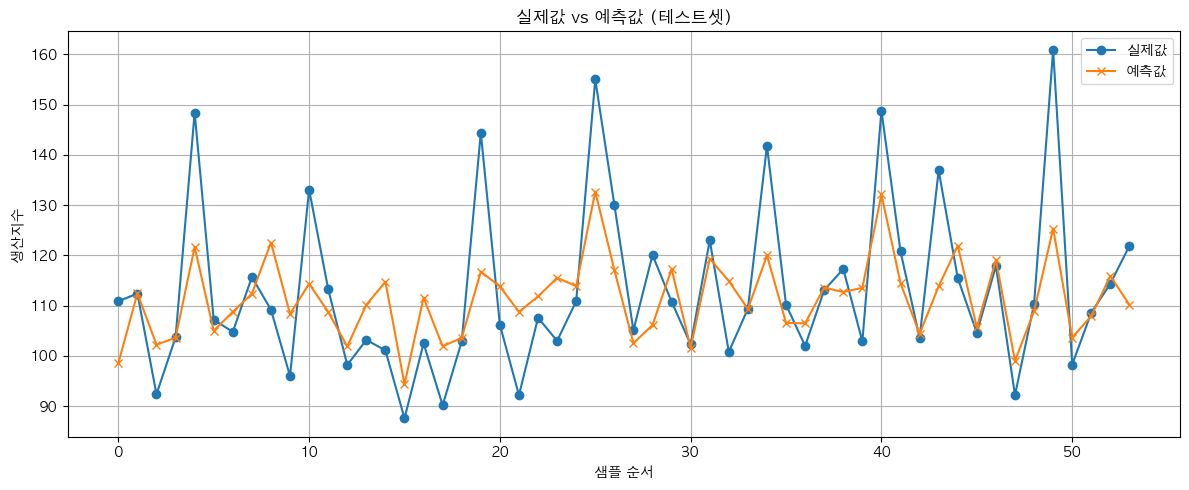

In [16]:
# ÏÑ†Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
plt.plot(result_df['Ïã§Ï†úÍ∞í'], label='Ïã§Ï†úÍ∞í', marker='o')
plt.plot(result_df['ÏòàÏ∏°Í∞í'], label='ÏòàÏ∏°Í∞í', marker='x')
plt.title("Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í (ÌÖåÏä§Ìä∏ÏÖã)")
plt.xlabel("ÏÉòÌîå ÏàúÏÑú")
plt.ylabel("ÏÉùÏÇ∞ÏßÄÏàò")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

---

# Option1Ïóê ÎåÄÌï¥ÏÑú Îî•Îü¨Îãù Test
## LSTM Î™®Îç∏ ÏÇ¨Ïö©

In [2]:
! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 536.2/536.2 kB 14.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 68.6/68.6 MB 38.5 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.9/1.9 MB 25.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 37.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.2/6.2 MB 30.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.7/1.7 MB 42.9 MB/s e

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# üìå 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option1_with_bsi_long.csv', encoding='utf-8')
df['region_code'] = df['region'].astype('category').cat.codes


In [2]:
# ÏâºÌëú Ï†úÍ±∞ Î∞è Ïà´ÏûêÌòï Î≥ÄÌôò
for col in ['power_kwh_industry', 'export_amount']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False).str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [3]:
#  lag Î≥ÄÏàò ÏÉùÏÑ±
lag_cols = ['power_kwh_industry', 'export_amount', 'util_rate']
for col in lag_cols:
    df[f'{col}_lag1'] = df.groupby('region')[col].shift(1)

In [4]:
# lag Î≥ÄÏàòÎèÑ ÏàòÏπòÌòïÏúºÎ°ú Í∞ïÏ†ú Î≥ÄÌôò
for col in ['power_kwh_industry_lag1', 'export_amount_lag1', 'util_rate_lag1']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
features = ['power_kwh_industry_lag1', 'export_amount_lag1', 'util_rate_lag1', 'region_code']
target = 'prod_index'
df.dropna(subset=features + [target], inplace=True)

In [6]:
X = df[features].values
y = df[target].values.reshape(-1, 1)

In [7]:
# Ï†ïÍ∑úÌôî
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [8]:
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [9]:
# ÏãúÍ≥ÑÏó¥ ÏûÖÎ†• ÌòïÌÉúÎ°ú Ïû¨Íµ¨ÏÑ± (sequence_length=3)
sequence_length = 6 # ÏõêÌïòÎäî Í∞úÏõîÏßúÎ¶¨ ÌùêÎ¶ÑÎ≥¥Í∏∞
X_seq, y_seq = [], []

for i in range(len(X_scaled) - sequence_length):
    X_seq.append(X_scaled[i:i+sequence_length])
    y_seq.append(y_scaled[i+sequence_length])

In [72]:
# ÏãúÍ≥ÑÏó¥ ÏûÖÎ†• ÌòïÌÉúÎ°ú Ïû¨Íµ¨ÏÑ± (sequence_length=3)
sequence_length = 6 # 6 Í∞úÏõîÏßúÎ¶¨ ÌùêÎ¶ÑÎ≥¥Í∏∞
X_seq, y_seq = [], []

for i in range(len(X_scaled) - sequence_length):
    X_seq.append(X_scaled[i:i+sequence_length])
    y_seq.append(y_scaled[i+sequence_length])

In [73]:
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [74]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)


In [75]:
# PyTorch ÌÖêÏÑú Î≥ÄÌôò
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

In [76]:
# LSTM Î™®Îç∏ Ï†ïÏùò
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

model = LSTMModel(input_dim=X_train.shape[2], hidden_dim=32)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [77]:
# ÌïôÏäµ
for epoch in range(100):
    model.train()
    output = model(X_train_t)
    loss = loss_fn(output, y_train_t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

Epoch 0 | Loss: 0.1394
Epoch 10 | Loss: 0.0249
Epoch 20 | Loss: 0.0185
Epoch 30 | Loss: 0.0166
Epoch 40 | Loss: 0.0160
Epoch 50 | Loss: 0.0159
Epoch 60 | Loss: 0.0159
Epoch 70 | Loss: 0.0158
Epoch 80 | Loss: 0.0158
Epoch 90 | Loss: 0.0158


In [78]:
#  ÏòàÏ∏° Î∞è ÏÑ±Îä•
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test_t).numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)  # ÏßÅÏ†ë Î£®Ìä∏ Ï†ÅÏö©
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("LSTM Î™®Îç∏ ÏÑ±Îä•")
print("{}Í∞úÏõîÏßúÎ¶¨ ÌùêÎ¶Ñ ÏòàÏ∏° Í≤∞Í≥º".format(sequence_length))
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.4f}")

LSTM Î™®Îç∏ ÏÑ±Îä•
6Í∞úÏõîÏßúÎ¶¨ ÌùêÎ¶Ñ ÏòàÏ∏° Í≤∞Í≥º
RMSE: 15.55, MAE: 11.46, R¬≤: 0.0930


[ Í≤∞Í≥º ]
- ÏòàÏ∏°Î†• ÎÇÆÏùå: R¬≤Í∞Ä 0.1 ÎØ∏ÎßåÏúºÎ°ú ÏòàÏ∏°Î†•Ïù¥ Îß§Ïö∞ ÎÇÆÏùÄ ÏàòÏ§Ä
- XGBoost (R¬≤=0.484) ÎåÄÎπÑ ÏÑ±Îä• ÌÅ¨Í≤å Ï†ÄÌïò
- Ïò§ÌûàÎ†§ Îã®Ïàú ÌöåÍ∑ÄÎ≥¥Îã§ Î™ªÌïú Í≤∞Í≥º ‚Üí Í≥ºÏ†ÅÌï© Ïö∞Î†§Îäî Ï†ÅÏúºÎÇò, Î™®Îç∏ ÌëúÌòÑÎ†• Î∂ÄÏ°± or ÌïôÏäµ Ïã§Ìå® Í∞ÄÎä•ÏÑ± ÏûàÏùå

### ÏûîÏ∞® Î∂ÑÏÑù ÏßÑÌñâ (ÏûîÏ∞®Î∂ÑÏÑù + Ïã§Í≥ÑÏó¥ Í∑∏ÎûòÌîÑ)

In [90]:
# ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'  # ‚úÖ MacÏù∏ Í≤ΩÏö∞
# plt.rcParams['font.family'] = 'Malgun Gothic'  # ‚úÖ WindowsÏù∏ Í≤ΩÏö∞
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ

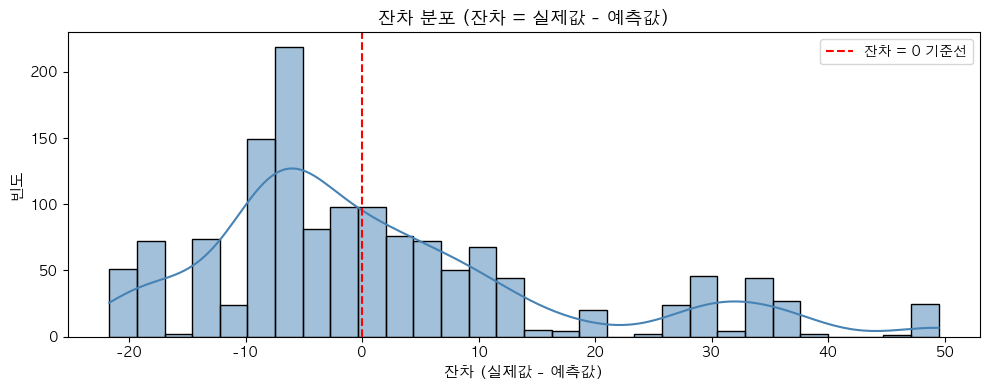

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ÏûîÏ∞® Í≥ÑÏÇ∞
residuals = y_true.flatten() - y_pred.flatten()

# Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(10, 4))
sns.histplot(residuals, bins=30, kde=True, color='steelblue')
plt.axvline(0, color='red', linestyle='--', label='ÏûîÏ∞® = 0 Í∏∞Ï§ÄÏÑ†')
plt.title("ÏûîÏ∞® Î∂ÑÌè¨ (ÏûîÏ∞® = Ïã§Ï†úÍ∞í - ÏòàÏ∏°Í∞í)", fontsize=13)
plt.xlabel("ÏûîÏ∞® (Ïã§Ï†úÍ∞í - ÏòàÏ∏°Í∞í)", fontsize=11)
plt.ylabel("ÎπàÎèÑ", fontsize=11)
plt.legend()
plt.tight_layout()
plt.show()

#### ÏûîÏ∞®Í∞Ä ÏñëÏàò ‚Üí ÏòàÏ∏°Í∞íÏù¥ Ïã§Ï†úÎ≥¥Îã§ ÏûëÏïòÎã§
#### ÏûîÏ∞®Í∞Ä ÏùåÏàò ‚Üí ÏòàÏ∏°Í∞íÏù¥ Ïã§Ï†úÎ≥¥Îã§ Ïª∏Îã§
#### ÏûîÏ∞®Í∞Ä 0Ïóê Í∞ÄÍπåÏõÄ ‚Üí ÏòàÏ∏° Ï†ïÌôïÎèÑ ÎÜíÏùå


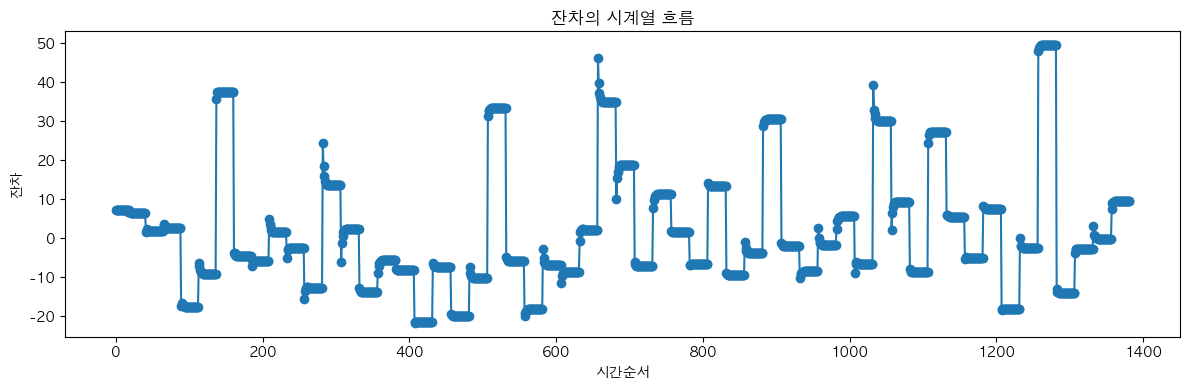

In [87]:
# ÏãúÍ≥ÑÏó¥ ÌùêÎ¶ÑÏúºÎ°ú Î≥¥Í∏∞
plt.figure(figsize=(12, 4))
plt.plot(residuals, marker='o')
plt.title("ÏûîÏ∞®Ïùò ÏãúÍ≥ÑÏó¥ ÌùêÎ¶Ñ")
plt.xlabel("ÏãúÍ∞ÑÏàúÏÑú")
plt.ylabel("ÏûîÏ∞®")
plt.tight_layout()
plt.show()

### ÏòàÏ∏°Í∞í ÌûàÌä∏Îßµ (ÏãúÏ†ê x ÏßÄÏó≠Î≥Ñ ÌùêÎ¶Ñ Í∞ÄÏãúÌôîÏö©)

In [93]:
# Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä df_modelÏù¥ÎùºÍ≥† Í∞ÄÏ†ï
# ÏòàÏ∏° Íµ¨Í∞ÑÎßå ÏûòÎùºÏÑú df_test Íµ¨ÏÑ±
df_model = df.dropna(subset=features + [target])
df_test = df_model.iloc[-len(y_test):].copy()

# ÏòàÏ∏°Í∞í Î∂ôÏù¥Í∏∞
df_test['pred'] = y_pred.flatten()

In [95]:
print(df_test.columns)

Index(['month', 'region', 'power_kwh_industry', 'power_kwh_total',
       'prod_index', 'temp_avg', 'precipitation', 'export_amount', 'util_rate',
       'indicator', 'value', 'region_code', 'power_kwh_industry_lag1',
       'export_amount_lag1', 'util_rate_lag1', 'pred'],
      dtype='object')


In [98]:
df_test.groupby(['month', 'region']).size().sort_values(ascending=False).head()

month       region
2024-12-01  Í≤ΩÎÇ®        25
2025-03-01  Í≤ΩÍ∏∞        25
2024-12-01  ÎåÄÍµ¨        25
            ÎåÄÏ†Ñ        25
            Î∂ÄÏÇ∞        25
dtype: int64

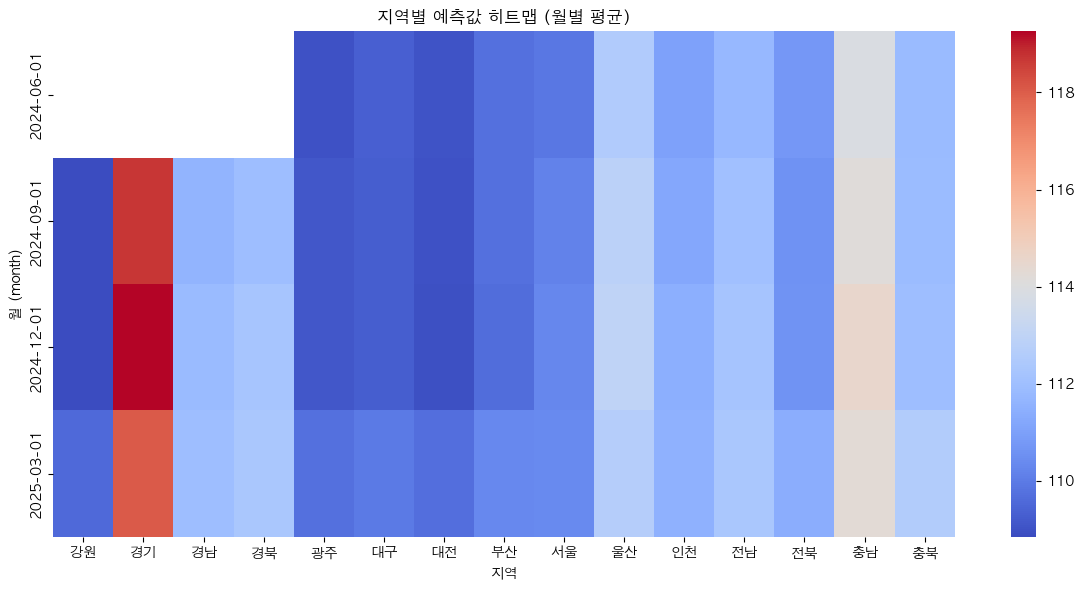

In [99]:
df_avg = df_test.groupby(['month', 'region'])['pred'].mean().reset_index()
pivot = df_avg.pivot(index='month', columns='region', values='pred')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=False)
plt.title("ÏßÄÏó≠Î≥Ñ ÏòàÏ∏°Í∞í ÌûàÌä∏Îßµ (ÏõîÎ≥Ñ ÌèâÍ∑†)")
plt.xlabel("ÏßÄÏó≠")
plt.ylabel("Ïõî (month)")
plt.tight_layout()
plt.show()

---

### Stacking Ensemble (Î™®Îç∏ Í≤∞Ìï©)
1Îã®Í≥Ñ Î™®Îç∏ (Base Learners):
- XGBoost
- LSTM
2.	ÏòàÏ∏°Í∞íÏùÑ ÏÉàÎ°úÏö¥ ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏó¨
3.	ÏµúÏ¢Ö ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÎäî Î©îÌÉÄ Î™®Îç∏(Final Layer):
- ÏÑ†ÌòïÌöåÍ∑Ä or XGBoost (Í∞ÑÎã®ÌïòÍ≤å)

### ÏùºÎã® XGBoost Î™®Îç∏ Í≤∞Í≥º ÏòàÏ∏°Í∞í ÌïÑÏöî

In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option1_with_bsi_long.csv', encoding='utf-8')

# Î¨∏ÏûêÏó¥ Ïà´Ïûê Ï≤òÎ¶¨
df['power_kwh_industry'] = df['power_kwh_industry'].str.replace(',', '', regex=False).astype(float)
df['export_amount'] = df['export_amount'].astype(float)

# wide-format Î≥ÄÌôò (BSI indicatorÎ•º ÌîºÎ≤ó)
df_pivoted = df.pivot_table(
    index=['month', 'region', 'prod_index', 'power_kwh_industry', 'export_amount', 'util_rate'],
    columns='indicator',
    values='value',
    aggfunc='first'
).reset_index()
df_pivoted.columns.name = None

# lag Î≥ÄÏàò ÏÉùÏÑ± (ÏßÄÏó≠Î≥Ñ Í∏∞Ï§Ä)
lag_targets = ['power_kwh_industry', 'export_amount', 'util_rate']
for col in lag_targets:
    df_pivoted[f'{col}_lag1'] = df_pivoted.groupby('region')[col].shift(1)

# ÏßÄÏó≠ Ïù∏ÏΩîÎî©
df_pivoted['region_code'] = df_pivoted['region'].astype('category').cat.codes

# Î™®Îç∏ ÌîºÏ≤ò & ÌÉÄÍπÉ ÏÑ§Ï†ï
features = ['power_kwh_industry_lag1', 'export_amount_lag1', 'util_rate_lag1', 'region_code']
target = 'prod_index'

# Í≤∞Ï∏° Ï†úÍ±∞
df_model = df_pivoted.dropna(subset=features + [target])
X = df_model[features]
y = df_model[target]

# ÏãúÍ≥ÑÏó¥ ÌäπÏÑ± Í≥†Î†§Ìïú Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Î™®Îç∏ ÌïôÏäµ
model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"option1 Í∏∞Î∞ò ÏÑ±Îä•\nRMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.4f}")

option1 Í∏∞Î∞ò ÏÑ±Îä•
RMSE: 11.89, MAE: 8.76, R¬≤: 0.4840


In [7]:
# ÏòàÏ∏°Í∞í Ï†ÄÏû•
np.save('y_pred_xgb.npy', y_pred)

In [8]:
y_pred_xgb = np.load('y_pred_xgb.npy')

___
### LSTM Í≤∞Í≥º Ï†ÄÏû•

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# üìå 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = pd.read_csv('Î≥ëÌï©ÌååÏùº/option1_with_bsi_long.csv', encoding='utf-8')
df['region_code'] = df['region'].astype('category').cat.codes

# ÏâºÌëú Ï†úÍ±∞ Î∞è Ïà´ÏûêÌòï Î≥ÄÌôò
for col in ['power_kwh_industry', 'export_amount']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False).str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

#  lag Î≥ÄÏàò ÏÉùÏÑ±
lag_cols = ['power_kwh_industry', 'export_amount', 'util_rate']
for col in lag_cols:
    df[f'{col}_lag1'] = df.groupby('region')[col].shift(1)

# lag Î≥ÄÏàòÎèÑ ÏàòÏπòÌòïÏúºÎ°ú Í∞ïÏ†ú Î≥ÄÌôò
for col in ['power_kwh_industry_lag1', 'export_amount_lag1', 'util_rate_lag1']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

features = ['power_kwh_industry_lag1', 'export_amount_lag1', 'util_rate_lag1', 'region_code']
target = 'prod_index'
df.dropna(subset=features + [target], inplace=True)

X = df[features].values
y = df[target].values.reshape(-1, 1)

# Ï†ïÍ∑úÌôî
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# ÏãúÍ≥ÑÏó¥ ÏûÖÎ†• ÌòïÌÉúÎ°ú Ïû¨Íµ¨ÏÑ± (sequence_length=3)
sequence_length = 6 # ÏõêÌïòÎäî Í∞úÏõîÏßúÎ¶¨ ÌùêÎ¶ÑÎ≥¥Í∏∞
X_seq, y_seq = [], []

for i in range(len(X_scaled) - sequence_length):
    X_seq.append(X_scaled[i:i+sequence_length])
    y_seq.append(y_scaled[i+sequence_length])

# ÏãúÍ≥ÑÏó¥ ÏûÖÎ†• ÌòïÌÉúÎ°ú Ïû¨Íµ¨ÏÑ± (sequence_length=3)
sequence_length = 6 # 6 Í∞úÏõîÏßúÎ¶¨ ÌùêÎ¶ÑÎ≥¥Í∏∞
X_seq, y_seq = [], []

for i in range(len(X_scaled) - sequence_length):
    X_seq.append(X_scaled[i:i+sequence_length])
    y_seq.append(y_scaled[i+sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# PyTorch ÌÖêÏÑú Î≥ÄÌôò
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# LSTM Î™®Îç∏ Ï†ïÏùò
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

model = LSTMModel(input_dim=X_train.shape[2], hidden_dim=32)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# ÌïôÏäµ
for epoch in range(100):
    model.train()
    output = model(X_train_t)
    loss = loss_fn(output, y_train_t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

#  ÏòàÏ∏° Î∞è ÏÑ±Îä•
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test_t).numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)  # ÏßÅÏ†ë Î£®Ìä∏ Ï†ÅÏö©
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("LSTM Î™®Îç∏ ÏÑ±Îä•")
print("{}Í∞úÏõîÏßúÎ¶¨ ÌùêÎ¶Ñ ÏòàÏ∏° Í≤∞Í≥º".format(sequence_length))
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.4f}")

Epoch 0 | Loss: 0.0534
Epoch 10 | Loss: 0.0186
Epoch 20 | Loss: 0.0165
Epoch 30 | Loss: 0.0160
Epoch 40 | Loss: 0.0157
Epoch 50 | Loss: 0.0156
Epoch 60 | Loss: 0.0155
Epoch 70 | Loss: 0.0154
Epoch 80 | Loss: 0.0153
Epoch 90 | Loss: 0.0151
LSTM Î™®Îç∏ ÏÑ±Îä•
6Í∞úÏõîÏßúÎ¶¨ ÌùêÎ¶Ñ ÏòàÏ∏° Í≤∞Í≥º
RMSE: 15.34, MAE: 11.22, R¬≤: 0.1169


In [3]:
# LSTM ÏòàÏ∏°Í∞í Ï†ÄÏû•
np.save('y_pred_lstm.npy', y_pred)

In [4]:
# Ïã§Ï†úÍ∞í Ï†ÄÏû•
np.save('y_test_lstm.npy', y_true)

In [12]:
# XGBoos ÏòàÏ∏° Í∏∏Ïù¥ ÎßûÏ∂îÍ∏∞
# LSTM Î™®Îç∏ÏóêÏÑú ÌÖåÏä§Ìä∏ÏÖã Ï†ÑÏ≤¥Î•º Ï†ÄÏû•Ìïú Î∞òÎ©¥, XGBoostÎäî ÏòàÏ∏°Í∞íÏù¥ 0.2 ÎπÑÏú®Î°ú ÏûòÎùºÏ†∏ÏÑú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏùå
# Îî∞ÎùºÏÑú XGBoost ÏòàÏ∏°Í∞íÏùÑ LSTM ÏòàÏ∏°Í∞í Í∏∏Ïù¥Ïóê ÎßûÏ∂∞ÏÑú
# 0.2 ÎπÑÏú®Î°ú ÏûòÎùºÏÑú Ï†ÄÏû•Îêú XGBoost ÏòàÏ∏°Í∞í
y_test_aligned = y_test[-len(y_xgb):]

print_metrics("XGBoost", y_test_aligned, y_xgb)
print_metrics("LSTM", y_test[-len(y_lstm):], y_lstm)

[XGBoost] RMSE: 10.09, MAE: 8.21, R¬≤: -4.2772
[LSTM] RMSE: 15.34, MAE: 11.22, R¬≤: 0.1169


/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_72984/3012625444.py:23: UserWarning: Glyph 49368 (\N{HANGUL SYLLABLE SAEM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_72984/3012625444.py:23: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_72984/3012625444.py:23: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_72984/3012625444.py:23: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ipykernel_72984/3012625444.py:23: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vz/_88n189s37g3f6cvqm98x9m00000gn/T/ip

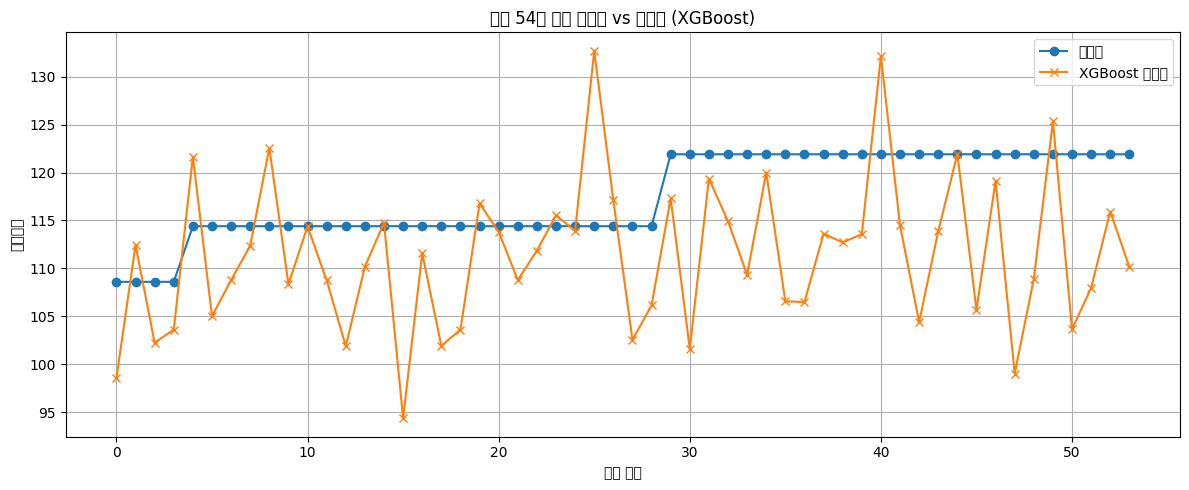

In [14]:
# XGBoost Í≤∞Í≥ºÍ∞íÏù¥ ÎÑàÎ¨¥ Ï¢ãÏßÄ ÏïäÏïÑÏÑú
# ÏòàÏ∏° 54Í∞ú Íµ¨Í∞Ñ ÏãúÍ∞ÅÌôîÌï¥ÏÑú ÏõêÏù∏ Îçî Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú ÏïåÏïÑÎ≥¥Í∏∞

import numpy as np
import matplotlib.pyplot as plt

# ÏòàÏ∏° Î∞è Ïã§Ï†úÍ∞í Î°úÎìú (Í≤ΩÎ°úÏóê ÎßûÍ≤å ÏàòÏ†ï)
y_xgb = np.load("y_pred_xgb.npy")
y_test = np.load("y_test_lstm.npy")  # Ïã§Ï†úÍ∞í

# ÏµúÍ∑º 54Í∞ú Íµ¨Í∞Ñ Ï∂îÏ∂ú
y_test_recent = y_test[-54:]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
plt.plot(y_test_recent, label='Ïã§Ï†úÍ∞í', marker='o')
plt.plot(y_xgb, label='XGBoost ÏòàÏ∏°Í∞í', marker='x')
plt.title("ÏµúÍ∑º 54Í∞ú ÏãúÏ†ê ÏòàÏ∏°Í∞í vs Ïã§Ï†úÍ∞í (XGBoost)")
plt.xlabel("ÏÉòÌîå ÏàúÏÑú")
plt.ylabel("ÏÉùÏÇ∞ÏßÄÏàò")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Í≤∞Í≥º 
- Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùò ÌÅ∞ Ï∂îÏÑ∏Îäî ÎπÑÏä∑ÌïòÍ≤å Îî∞ÎùºÍ∞ÄÏßÄÎßå, ÏùºÎ∂Ä Íµ¨Í∞ÑÏóêÏÑúÎäî Ïã§Ï†úÍ∞íÍ≥º Í¥¥Î¶¨Í∞Ä ÌÅ∞ Í≤ΩÏö∞Í∞Ä Ï°¥Ïû¨.
- R¬≤ ÏÑ±Îä•Ïù¥ Í∏∞Ï°¥ Ï†ÑÏ≤¥ ÏòàÏ∏°ÏóêÏÑúÎäî 0.4840Ïù¥ÏóàÏúºÎÇò, Ïù¥ ÏµúÍ∑º 54Í∞ú Íµ¨Í∞ÑÏóêÏÑúÎäî -4.2772Î°ú Îß§Ïö∞ ÎÇÆÏïÑÏßÑ Ïù¥Ïú†Îäî, ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä Ïã§Ï†úÏôÄ ÎßûÏßÄ ÏïäÎäî ÌäπÏ†ï Íµ¨Í∞ÑÏù¥ Ï°¥Ïû¨ÌïòÍ∏∞ ÎïåÎ¨∏ÏûÑ.

### ÏàòÏ†ïÏÇ¨Ìï≠
- ÏòàÏ∏°Ïù¥ Ïã§Ìå®Ìïú ÌäπÏ†ï ÏãúÏ†ê ÌôïÏù∏ Î∞è Ìï¥Îãπ Íµ¨Í∞ÑÏùò ÌäπÏù¥Ï†ê ÌÉêÏßÄ
- Îã§Î•∏ Î™®Îç∏ Í≤∞Ìï©Ïù¥ÎÇò ÏãúÍ≥ÑÏó¥ ÌäπÏÑ± Í∞ïÌôî (Ïòà: ÏàúÌôòÏã†Í≤ΩÎßù, Prophet Îì±) Í≤ÄÌÜ†

In [21]:
print(f"y_test Í∏∏Ïù¥: {len(y_test)}, y_pred Í∏∏Ïù¥: {len(y_pred)}")

y_test Í∏∏Ïù¥: 1382, y_pred Í∏∏Ïù¥: 54


In [24]:
# LSTM Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ÏÑú ÏãúÍ≥ÑÏó¥ÏùÑ ÏûòÎùºÎÇ¥Ïñ¥ ÎßàÏßÄÎßâ 54Í∞ú Íµ¨Í∞ÑÎßå ÏòàÏ∏°ÌïúÍ±∏Î°ú Î≥¥ÏûÑ
# Ï¶â y_predÎäî y_test Ï†ÑÏ≤¥Í∞Ä ÏïÑÎãå ÏùºÎ∂Ä Íµ¨Í∞ÑÎßå ÏòàÏ∏°Í≤∞Í≥º
# ÏòàÏ∏°Í∞í(y_pred)Ïù¥ ÎåÄÏùëÌïòÎäî Ïã§Ï†úÍ∞í Íµ¨Í∞Ñ(y_test)Îßå ÏûòÎùºÏÑú ÎπÑÍµêÌï¥ÏïºÌï®
# Î≥¥ÌÜµ ÎßàÏßÄÎßâ Íµ¨Í∞ÑÏóêÏÑú ÏûòÎùºÏò® Í≤ÉÏù¥ÎØÄÎ°ú
# y_test[-len(y_pred):]Î°ú ÏûòÎùºÏÑú ÎπÑÍµê
y_test_short = y_test[-len(y_pred):]  # ÎßàÏßÄÎßâ 54Í∞ú Íµ¨Í∞ÑÎßå ÎπÑÍµê

# ÏòàÏ∏°Ìïú Íµ¨Í∞ÑÍ≥º ÎåÄÏùëÌïòÎäî Ïã§Ï†úÍ∞íÎßå ÎπÑÍµê
# ÏÉÅÏúÑ Ïò§Ï∞® Íµ¨Í∞ÑÏùÑ Ï†ïÌôïÌûà Ïû°ÏïÑÎÇº Ïàò ÏûàÍ≤åÌïòÍ∏∞ ÏúÑÌï®
result_df = pd.DataFrame({
    'Ïã§Ï†úÍ∞í': y_test_short.flatten(),
    'ÏòàÏ∏°Í∞í': y_pred.flatten()
})
result_df['Ïò§Ï∞®'] = abs(result_df['Ïã§Ï†úÍ∞í'] - result_df['ÏòàÏ∏°Í∞í'])

top_errors = result_df.sort_values(by='Ïò§Ï∞®', ascending=False).head(5)
print(top_errors)
# Ïù¥Í±∏ Í∏∞Î∞òÏúºÎ°ú ÌäπÏù¥ ÏãúÏ†ê Î∂ÑÏÑùÏùÑ Í≥ÑÏÜç ÏßÑÌñâ

      Ïã§Ï†úÍ∞í         ÏòàÏ∏°Í∞í         Ïò§Ï∞®
47  121.9   99.037148  22.862852
30  121.9  101.621948  20.278052
15  114.4   94.366516  20.033484
25  114.4  132.698837  18.298837
50  121.9  103.651749  18.248251


# Ïù¥ ÏãúÏ†êÏùò ÎÇ†ÏßúÏôÄ ÏßÄÏó≠ Ï†ïÎ≥¥ ÌôïÏù∏
# ÌäπÏù¥Ìïú ÏßÄÌëúÍ∞íÏù¥ ÏûàÎäîÏßÄ ÌÉêÏÉâ
# Ìå®ÌÑ¥ ÏóÜÎäî Ïù¥ÏÉÅÏπòÏù∏ÏßÄ, ÏòàÏ∏°Ïù¥ Ïñ¥Î†§Ïö¥ ÌùêÎ¶ÑÏù¥ÏóàÎäîÏßÄ ÌåêÎã® ÌïÑÏöî

In [25]:
# ÌÖåÏä§Ìä∏ÏÖã ÏãúÏûë Ïù∏Îç±Ïä§ Í≥ÑÏÇ∞ (shuffle=False Í∏∞Ï§Ä)
test_index_start = int(len(df_model) * 0.8)
top_error_indices = [47, 30, 15, 25, 50]  # ÏòàÏ∏° Ïò§Ï∞® ÌÅ∞ ÏãúÏ†ê Ïù∏Îç±Ïä§

# df_pivoted ÏõêÎ≥∏ÏóêÏÑú Ìï¥Îãπ ÏãúÏ†ê Ï†ïÎ≥¥ Ï∂îÏ∂ú
error_rows = df_pivoted.iloc[test_index_start + np.array(top_error_indices)]

# Í≤∞Í≥º Ï∂úÎ†•
pd.set_option('display.max_columns', None)  # Î™®Îì† Ïª¨Îüº Î≥¥Í∏∞
print("ÏòàÏ∏° Ïã§Ìå® ÏãúÏ†êÏùò ÌäπÏù¥ Îç∞Ïù¥ÌÑ∞")
display(error_rows)

ÏòàÏ∏° Ïã§Ìå® ÏãúÏ†êÏùò ÌäπÏù¥ Îç∞Ïù¥ÌÑ∞


month region  prod_index  power_kwh_industry  export_amount  \
263  2024-12-01     ÏÑúÏö∏       100.8        3.970033e+08     68384045.0   
246  2024-09-01     ÎåÄÏ†Ñ        87.6        2.579770e+08      3346184.0   
231  2024-06-01     ÎåÄÏ†Ñ       110.9        2.480019e+08      2258875.0   
241  2024-09-01     Í≤ΩÍ∏∞       133.1        6.423700e+09    119858190.0   
266  2024-12-01     Ï†ÑÎÇ®       110.2        1.861556e+09     45567263.0   

     util_rate  Í≤ΩÏÉÅÏù¥ÏùµÏ†ÑÎßù  Í≤ΩÏÉÅÏù¥ÏùµÌòÑÌô©   Í≥†Ïö©Ï†ÑÎßù  Í≥†Ïö©ÌòÑÌô©  Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÏ†ÑÎßù  Íµ≠ÎÇ¥ÏãúÏû•Ï∂úÌïòÌòÑÌô©  Îß§Ï∂úÏï°Ï†ÑÎßù  Îß§Ï∂úÏï°ÌòÑÌô©  \
263       73.2    83.0    84.0   99.0  98.0      89.0      82.0   90.0   82.0   
246       73.3    93.0    84.0  103.0  98.0      97.0      87.0   99.0   82.0   
231       73.5   100.0    89.0  101.0  99.0     106.0      84.0  109.0   84.0   
241       73.3    93.0    84.0  101.0  97.0      98.0      85.0   98.0   84.0   
266       73.2    86.0    88.0   97.0  96.0      90.0      92.0   91.0   92.0   

     Î∂ÄÍ∞ÄÍ∞ÄÏπòÎπÑÏ§ë (%)  ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†Ï†ÑÎßù  ÏÑ§ÎπÑÍ∞ÄÎèôÎ•†ÌòÑÌô©  ÏÑ§ÎπÑÌà¨ÏûêÏ†ÑÎßù  ÏÑ§ÎπÑÌà¨ÏûêÌòÑÌô©   ÏàòÏ∂úÏ†ÑÎßù   ÏàòÏ∂úÌòÑÌô©   ÏãúÌô©Ï†ÑÎßù  ÏãúÌô©ÌòÑÌô©  \
263         2.0     95.0     95.0    96.0    96.0   94.0   88.0   87.0  80.0   
246         1.0    104.0     93.0   104.0   102.0  106.0   88.0   94.0  81.0   
231         NaN    107.0     95.0   103.0   101.0  105.0  100.0  102.0  84.0   
241        38.0    101.0     91.0    99.0    96.0  102.0   89.0   96.0  82.0   
266         7.0     93.0     95.0    98.0    93.0   88.0   92.0   88.0  82.0   

     ÏõêÏûêÏû¨Í∞ÄÍ≤©Ï†ÑÎßù  ÏõêÏûêÏû¨Í∞ÄÍ≤©ÌòÑÌô©  ÏûêÍ∏àÏÇ¨Ï†ïÏ†ÑÎßù  ÏûêÍ∏àÏÇ¨Ï†ïÌòÑÌô©   Ïû¨Í≥†Ï†ÑÎßù   Ïû¨Í≥†ÌòÑÌô©  Ï†úÌíàÍ∞ÄÍ≤©Ï†ÑÎßù  Ï†úÌíàÍ∞ÄÍ≤©ÌòÑÌô©  \
263    115.0    121.0    85.0    79.0  101.0  102.0    99.0   101.0   
246    116.0    114.0    91.0    80.0   99.0  105.0   101.0   101.0   
231    113.0    122.0    96.0    86.0  101.0   93.0   106.0   105.0   
241    115.0    118.0    89.0    86.0  101.0  102.0   101.0   103.0   
266    115.0    123.0    86.0    79.0  102.0   97.0   106.0   104.0   

     power_kwh_industry_lag1  export_amount_lag1  util_rate_lag1  region_code  
263             4.424079e+08          50994729.0            73.3            8  
246             2.480019e+08           2258875.0            73.5            6  
231             2.424381e+08           1132593.0            71.5            6  
241             6.128592e+09          78325059.0            73.5            1  
266             1.823910e+09          35093505.0            73.3           11

### ÏòàÏ∏° Ïã§Ìå® Íµ¨Í∞ÑÏùò ÌäπÏù¥Ï†ê Î∂ÑÏÑù

| ÏàúÏúÑ | Ïõî       | ÏßÄÏó≠ | Ïã§Ï†úÍ∞í | ÏòàÏ∏°Í∞í  | Ïò§Ï∞®   | Ï£ºÏöî ÌäπÏù¥Ï†ê ÏöîÏïΩ |
|------|----------|------|--------|--------|--------|------------------|
| 1    | 2024-12  | ÏÑúÏö∏ | 121.9  | 99.0   | 22.9   | ÏÇ∞ÏóÖÏ†ÑÎ†• ÏÇ¨Ïö©Îüâ Ï†ÑÏõî ÎåÄÎπÑ ÏïΩ -10% Í∏âÍ∞ê |
| 2    | 2024-09  | ÎåÄÏ†Ñ | 121.9  | 101.6  | 20.3   | ÏàòÏ∂úÍ∏àÏï° Ï†ÑÏõî ÎåÄÎπÑ ÏïΩ +48% Í∏âÏ¶ù |
| 3    | 2024-06  | ÎåÄÏ†Ñ | 114.4  | 94.4   | 20.0   | Ï†ÑÎ†•¬∑ÏàòÏ∂ú Î™®Îëê ÎÇÆÍ≥† ÏòàÏô∏Ï†Å Î∂ÑÍ∏∞ Í∞ÄÎä•ÏÑ± |
| 4    | 2024-09  | Í≤ΩÍ∏∞ | 114.4  | 132.7  | 18.3   | ÏÇ∞ÏóÖÏ†ÑÎ†•/ÏàòÏ∂ú Í∏âÎì± (ÏòàÏô∏Ï†Å Í∑úÎ™®) |
| 5    | 2024-12  | Ï†ÑÎÇ® | 121.9  | 103.6  | 18.2   | Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ Ï†ÑÏõî ÎåÄÎπÑ ÏïΩ +30% Í∏âÏ¶ù |

### ÏòàÏ∏° Ïã§Ìå® ÏõêÏù∏ Î≥¥ÏôÑÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Í∞úÏÑ† Î∞©Ïïà

| Ìï≠Î™© | ÏÑ§Î™Ö | Í∏∞ÎåÄ Ìö®Í≥º |
|------|------|-----------|
| Î≥ÄÌôîÏú® Í∏∞Î∞ò ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä | Ï†ÑÎ†• ÏÇ¨Ïö©Îüâ, ÏàòÏ∂úÍ∏àÏï°, Í∞ÄÎèôÎ•† Îì±Ïùò Ï†ÑÏõî ÎåÄÎπÑ Î≥ÄÌôîÏú®(%) ÏÉùÏÑ± | Í∏âÎ≥ÄÌïòÎäî Íµ¨Í∞ÑÏùÑ Îçî ÎØºÍ∞êÌïòÍ≤å Î∞òÏòÅ Í∞ÄÎä• |
| Î≥ÄÏàò ÌëúÏ§ÄÌôî Î∞©Ïãù Í∞úÏÑ† | ÌòÑÏû¨ MinMax Ïä§ÏºÄÏùºÎßÅ Ïô∏Ïóê Z-score Í∏∞Î∞ò ÌëúÏ§ÄÌôî Î≥ëÌñâ | Ïù¥ÏÉÅÍ∞í ÎØºÍ∞êÎèÑ Ï§ÑÏù¥Í≥† ÏùºÎ∞òÌôî Îä•Î†• Í∞úÏÑ† |
| Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Î∞è Ï†úÍ±∞ | Ï†ÑÎ†•/ÏàòÏ∂ú Îì±Ïùò Í∏âÎì±ÎùΩ ÏãúÏ†êÏùÑ IQR ÎòêÎäî LOF Í∏∞Î∞òÏúºÎ°ú ÌÉêÏßÄ | ÏòàÏô∏Ï†Å ÏÉÅÌô© Ï†úÍ±∞Î°ú ÏïàÏ†ïÏ†Å ÌïôÏäµ |
| ÏãúÍ∞Ñ ÏöîÏù∏ Í∞ïÌôî | ‚ÄòÏõî‚Äô, ‚ÄòÎ∂ÑÍ∏∞‚Äô, ‚ÄòÍ≥ÑÏ†à‚Äô Îì± ÏãúÍ≥ÑÏó¥ Ï£ºÍ∏∞ ÏöîÏù∏ Î∞òÏòÅ | ÏãúÏ¶åÏÑ± Î∞òÏòÅÏúºÎ°ú Ï†ïÍ∏∞Ï†Å Î≥ÄÎèô ÏòàÏ∏° Í∞ÄÎä• |
| ÏßÄÏó≠ ÎÇ¥ Î≥ÄÎèôÏÑ± ÏßÄÌëú ÎèÑÏûÖ | Í∞Å ÏßÄÏó≠Î≥Ñ ÏµúÍ∑º 3~6Í∞úÏõî ÌèâÍ∑†/ÌëúÏ§ÄÌé∏Ï∞® Îì± ÌÜµÍ≥ÑÎüâ ÌôúÏö© | ÏßÄÏó≠Î≥Ñ ÏïàÏ†ïÏÑ± ÎòêÎäî Î≥ÄÎèôÏÑ±ÏùÑ Í≥†Î†§Ìïú ÏòàÏ∏° Ï†ïÎ∞ÄÎèÑ Í∞úÏÑ† |

In [15]:
# XGBoostÏôÄ LSTM ÏòàÏ∏°Í∞í ÎπÑÍµê
# LSTM ÌÖåÏä§Ìä∏ Ïã§Ï†ú Í∞íÎèÑ Ï∂îÍ∞Ä
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ÌååÏùº Î°úÎìú
y_xgb = np.load("y_pred_xgb.npy")
y_lstm = np.load("y_pred_lstm.npy")
y_test = np.load("y_test_lstm.npy")

# Í∞Å ÏÑ±Îä• ÎπÑÍµê
def print_metrics(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"[{name}] RMSE: {rmse:.2f}, MAE: {mae:.2f}, R¬≤: {r2:.4f}")

print_metrics("XGBoost", y_test, y_xgb)
print_metrics("LSTM", y_test, y_lstm)

ValueError: Found input variables with inconsistent numbers of samples: [1382, 54]